In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ConsumerElectronics.csv',na_values=['\\N',''])


C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(10)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,NaN,NaN,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,NaN,NaN,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,NaN,NaN,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,NaN,NaN,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,NaN,NaN,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
5,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324,1,NaN,NaN,Prepaid,5,-7.64154636189174E+018,-1.91905269756031E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
6,ACCCX3S5JGAJETYR,2015-10-16 14:59:57,2015,10,3.418429e+15,3.418429e+15,3695,1,NaN,NaN,Prepaid,6,-7.15614041481066E+016,6.40491320207757E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
7,ACCCX3S5JGAJETYR,2015-10-15 23:41:39,2015,10,3.417799e+15,3.417799e+15,3695,1,NaN,NaN,COD,5,9.17327596234152E+018,-1.60630305201981E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2.417870e+15,2.417870e+15,,1,NaN,NaN,Prepaid,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
9,ACCCX3S5JGAJETYR,2015-10-25 22:52:34,2015,10,4.426482e+15,4.426482e+15,3695,1,NaN,NaN,COD,7,-7.80915606896163E+018,-9.779010321304E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5


In [4]:
df.shape

(1648824, 20)

### Data preparation

In [5]:
### Converting gmv, cust_id, pincode to numeric to read the null values

df.gmv = pd.to_numeric(df.gmv, errors="coerce")
df.pincode = pd.to_numeric(df.pincode, errors="coerce")
df.cust_id = pd.to_numeric(df.cust_id, errors="coerce")

In [6]:
# null values checks
df.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                   4904
units                                    0
deliverybdays                      1312972
deliverycdays                      1312971
s1_fact.order_payment_type               0
sla                                      0
cust_id                               4904
pincode                               4904
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical             5828
product_mrp                              0
product_procurement_sla                  0
dtype: int64

There are 4904 missing values for gmv,pincode and cust_id

In [7]:
# To remove null values from gmv,pincode and cust_id
df=df[~np.isnan(df['gmv'])]
df=df[~np.isnan(df['cust_id'])]
df=df[~np.isnan(df['pincode'])]

In [8]:
# column-wise null percentages here
round(100*(df.isnull().sum()/len(df.index)),2)

fsn_id                              0.00
order_date                          0.00
Year                                0.00
Month                               0.00
order_id                            0.00
order_item_id                       0.00
gmv                                 0.00
units                               0.00
deliverybdays                      79.57
deliverycdays                      79.57
s1_fact.order_payment_type          0.00
sla                                 0.00
cust_id                             0.00
pincode                             0.00
product_analytic_super_category     0.00
product_analytic_category           0.00
product_analytic_sub_category       0.00
product_analytic_vertical           0.35
product_mrp                         0.00
product_procurement_sla             0.00
dtype: float64

In [9]:
# Dropping deliverybdays and deliverycdays  column since it's having 80% null values.
df=df.drop(['deliverybdays','deliverycdays'],axis=1)

In [10]:
df.shape

(1643920, 18)

In [11]:
df=df.dropna(subset=['product_analytic_vertical'],axis=0)

In [12]:
df.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [13]:
df.shape

(1638106, 18)

In [14]:
# Number of rows with MRP value as zero
df[df['product_mrp']==0].shape


(5290, 18)

We have 5290 records with product_mrp as zero value, which is not a valid scenario. We cannot have product with product_mrp as zero. Hence deleting those recors

In [15]:
# Delete product with product_mrp as zero
df=df[df.product_mrp!=0]

In [16]:
df.shape

(1632816, 18)

In [17]:
# Number of records with product_procurement_sla as -1
df[df['product_procurement_sla']==-1].shape

(70321, 18)

Negative values in product_procurement_sla is invalid scenario. Hence replacing with zero values

In [18]:
# replace product_procurement_sla negative values with zero
df['product_procurement_sla']=df['product_procurement_sla'].replace(-1,0)

In [19]:
df.shape

(1632816, 18)

In [20]:
# Almost 50% cust_id is having negative values
df[df['cust_id']<0].shape

(817926, 18)

In [21]:
# Almost 50% pincode is having negative values
df[df['pincode']<0].shape

(805932, 18)

In [22]:
# Dropping cust_id and pincode from dataset since it will not helpful for the model
df=df.drop(['cust_id','pincode'],axis=1)


In [23]:
df.describe()

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla
count,1.632816e+06,1.632816e+06,1.632816e+06,1.632816e+06,1.632816e+06,1.632816e+06,1.632816e+06,1.632816e+06,1.632816e+06
mean,2.015519e+03,6.582622e+00,2.842424e+15,1.371587e+16,2.450530e+03,1.021943e+00,5.693237e+00,4.103883e+03,5.482460e+00
std,4.996213e-01,3.625040e+00,1.268668e+15,5.584622e+16,5.605788e+03,2.518061e-01,2.984569e+00,8.528829e+03,5.366434e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,0.000000e+00,1.000000e+00,0.000000e+00,4.900000e+01,0.000000e+00
25%,2.015000e+03,3.000000e+00,1.602417e+15,1.606559e+15,3.400000e+02,1.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611734e+15,2.619034e+15,7.490000e+02,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610817e+15,4.397626e+15,1.999000e+03,1.000000e+00,7.000000e+00,3.495000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,2.269470e+05,5.000000e+01,1.006000e+03,2.999990e+05,1.000000e+03


In [24]:
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,COD,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,COD,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


Adding new column Week_Number

In [25]:
# convert order_date to datetime
df['order_date']=pd.to_datetime(df['order_date'], dayfirst=True)

In [26]:
# Extract week number from order_date
df['Week_Number'] = df['order_date'].dt.week

Adding new column pay_flag

In [27]:
# Add pay_flag
df['pay_flag']= df.order_date.dt.day.isin([1,15]).astype(np.int8)

Adding new column Holiday_flag


In [28]:
df['order_date']=df['order_date'].dt.strftime('%Y-%m-%d')

In [29]:
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Week_Number,pay_flag
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,0
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1.420831e+15,1.420831e+15,6900.0,1,COD,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,0
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2.421913e+15,2.421913e+15,1990.0,1,COD,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,0
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,0
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,0


Adding new column Holiday_flag

In [30]:
holiday={'holiday':['2015-06-18','2015-06-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30','2015-10-17','2015-10-16','2015-10-15','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12','2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31','2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21','2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-03-25','2016-03-26','2016-03-27']}

In [31]:
df_holiday=pd.DataFrame(holiday)

In [32]:
# Add holiday_flag
df['holiday_flag']= df.order_date.isin(df_holiday.holiday).astype(np.int8)

In [33]:
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Week_Number,pay_flag,holiday_flag
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,0,1
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1.420831e+15,1.420831e+15,6900.0,1,COD,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,0,0
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2.421913e+15,2.421913e+15,1990.0,1,COD,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,0,0
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,0,0
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,0,1


Understanding the Data Dictionary

In [34]:
df['s1_fact.order_payment_type'].astype('category').value_counts()

COD        1184291
Prepaid     448525
Name: s1_fact.order_payment_type, dtype: int64

In [35]:
df['product_analytic_super_category'].astype('category').value_counts()

CE    1632816
Name: product_analytic_super_category, dtype: int64

In [36]:
# dropping product_analytic_super_category column which is not having any variance
df=df.drop('product_analytic_super_category',axis=1)

In [37]:
# dropping fsn_id , since it's a unique value will not be helpful for model
df=df.drop('fsn_id',axis=1)

In [38]:
# convert order_date to datetime
df['order_date']=pd.to_datetime(df['order_date'], dayfirst=True)

In [39]:
df['product_analytic_category'].astype('category').value_counts()

EntertainmentSmall    935393
CameraAccessory       253581
GamingHardware        229994
GameCDDVD             113820
Camera                100028
Name: product_analytic_category, dtype: int64

In [40]:
df['product_analytic_sub_category'].astype('category').value_counts()

Speaker                535981
CameraAccessory        235717
GamingAccessory        201101
TVVideoSmall           142565
HomeAudio              124355
Game                   113723
AudioMP3Player         112544
Camera                 100028
GamingConsole           28893
CameraStorage           17864
AudioAccessory          11660
HomeTheatre              4245
AmplifierReceiver        4043
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [41]:
df['product_analytic_vertical'].astype('category').value_counts()

LaptopSpeaker              286602
MobileSpeaker              249379
AudioMP3Player             112544
PhysicalGame               104392
HomeAudioSpeaker            85298
GamingHeadset               62180
GamePad                     58939
DSLR                        56371
Flash                       48711
SelectorBox                 46116
RemoteControl               39583
CameraBattery               38754
Point & Shoot               37970
CameraTripod                37745
GamingMouse                 37350
VideoGlasses                36644
Lens                        35121
FMRadio                     28147
VideoPlayer                 20222
HandheldGamingConsole       19344
CameraStorageMemoryCard     17864
CameraBag                   17422
CameraBatteryCharger        15362
Binoculars                  14541
Filter                      12572
GamingConsole                9549
CodeInTheBoxGame             9331
GamingAccessoryKit           9323
Microphone                   9037
TVOutCableAcce

Filtering the dataframe  for camera accessory, home audio and gaming accessory.

In [42]:
subcategories=['CameraAccessory','GamingAccessory','HomeAudio']

In [43]:
df_new=df[df.product_analytic_sub_category.isin(subcategories)]

In [44]:
df_new.shape

(561173, 17)

In [45]:
df_new.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Week_Number,pay_flag,holiday_flag
0,2015-10-17,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,0,1
1,2015-10-19,2015,10,1.420831e+15,1.420831e+15,6900.0,1,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,0,0
2,2015-10-20,2015,10,2.421913e+15,2.421913e+15,1990.0,1,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,0,0
3,2015-10-14,2015,10,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,0,0
4,2015-10-17,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,0,1


Adding new column list price

In [46]:
df_new['list_price']=df_new['gmv']/df_new['units']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Adding a new column discount

In [47]:
df_new['discount']=(df_new['product_mrp']-df_new['list_price'])/df_new['product_mrp']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_new.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,Week_Number,pay_flag,holiday_flag,list_price,discount
0,2015-10-17,2015,10,3.419301e+15,3.419301e+15,6400.0,1,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,0,1,6400.0,0.109875
1,2015-10-19,2015,10,1.420831e+15,1.420831e+15,6900.0,1,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,0,0,6900.0,0.040334
2,2015-10-20,2015,10,2.421913e+15,2.421913e+15,1990.0,1,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,0,0,1990.0,0.051929
3,2015-10-14,2015,10,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,0,0,1690.0,0.194855
4,2015-10-17,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,0,1,1618.0,0.229157


#### Checking for Outliers

In [49]:
# Checking for outliers in the continuous variables
df_new1 = df_new[['gmv','list_price','discount']]

In [50]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df_new1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,gmv,list_price,discount
count,561173.000000,561173.000000,561173.000000
mean,1288.286950,1271.424589,0.444539
std,2437.698893,2419.968046,0.253132
min,0.000000,0.000000,-7.042817
25%,299.000000,298.000000,0.257095
50%,555.000000,549.000000,0.452857
75%,1499.000000,1490.000000,0.626131
90%,2799.000000,2773.000000,0.787500
95%,4069.000000,4040.000000,0.850851
99%,9299.000000,9227.280000,0.914573


Outlier is there for gmv above 99th percentiles. Hence removing the data greater than 99th 

In [51]:
df_new=df_new[df_new.gmv < df_new.gmv.quantile(.995)]

In [52]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df_new1 = df_new[['gmv','list_price','discount']]
df_new1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,gmv,list_price,discount
count,558361.000000,558361.000000,558361.000000
mean,1169.180560,1154.384803,0.445733
std,1520.844645,1508.651174,0.252742
min,0.000000,0.000000,-1.951807
25%,299.000000,297.000000,0.259259
50%,549.000000,545.000000,0.454950
75%,1490.000000,1449.000000,0.626250
90%,2739.000000,2699.000000,0.788750
95%,3907.000000,3890.000000,0.850851
99%,8499.000000,8499.000000,0.915500


In [53]:
df_new.shape

(558361, 19)

#### media investment data

In [54]:
# Reading media investment data
df_media=pd.read_excel('Media data and other information.xlsx',sheet_name='Media Investment',header=2)

In [55]:
df_media=df_media.fillna(0)

Converting media investment data to weekly level by diving 4.

In [56]:
df_media[['Total Investment','TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM','Radio','Other']]=df_media[['Total Investment','TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM','Radio','Other']].div(4,axis=0)

In [57]:
df_media.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
NaN,2015,7,4.265444,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
NaN,2015,8,1.266077,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,0.628382,0.0,0.0
NaN,2015,9,24.063595,0.969876,0.339132,15.696913,0.152573,4.094997,1.259567,1.550537,0.0,0.0
NaN,2015,10,42.539074,1.536178,3.155620,21.168133,0.861019,6.092944,1.743428,7.981753,0.0,0.0
NaN,2015,11,12.804055,1.055157,0.318867,3.543029,0.042158,4.890394,1.648942,1.305508,0.0,0.0


#### Climate data

In [58]:
df_climate_15 = pd.read_csv('ONTARIO-2015.csv', skiprows=24)

In [59]:
df_climate_15.shape

(365, 27)

In [60]:
# column-wise null percentages here
round(100*(df_climate_15.isnull().sum()/len(df_climate_15.index)),2)

Date/Time                      0.00
Year                           0.00
Month                          0.00
Day                            0.00
Data Quality                  37.26
Max Temp (°C)                 40.82
Max Temp Flag                 96.44
Min Temp (°C)                 47.95
Min Temp Flag                 89.32
Mean Temp (°C)                47.95
Mean Temp Flag                89.32
Heat Deg Days (°C)            47.95
Heat Deg Days Flag            89.32
Cool Deg Days (°C)            47.95
Cool Deg Days Flag            89.32
Total Rain (mm)               37.26
Total Rain Flag               98.08
Total Snow (cm)               37.26
Total Snow Flag               97.53
Total Precip (mm)             37.26
Total Precip Flag             96.71
Snow on Grnd (cm)             37.26
Snow on Grnd Flag             99.45
Dir of Max Gust (10s deg)    100.00
Dir of Max Gust Flag         100.00
Spd of Max Gust (km/h)       100.00
Spd of Max Gust Flag         100.00
dtype: float64

In [61]:
# Dropping rows since it's more null values.
df_climate_15=df_climate_15.drop(['Max Temp Flag','Min Temp Flag','Mean Temp Flag','Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Total Snow Flag','Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag','Spd of Max Gust (km/h)','Spd of Max Gust Flag'],axis=1)

In [62]:
df_climate_15=df_climate_15.fillna(0)

In [63]:
# column-wise null percentages here
round(100*(df_climate_15.isnull().sum()/len(df_climate_15.index)),2)

Date/Time             0.0
Year                  0.0
Month                 0.0
Day                   0.0
Data Quality          0.0
Max Temp (°C)         0.0
Min Temp (°C)         0.0
Mean Temp (°C)        0.0
Heat Deg Days (°C)    0.0
Cool Deg Days (°C)    0.0
Total Rain (mm)       0.0
Total Snow (cm)       0.0
Total Precip (mm)     0.0
Snow on Grnd (cm)     0.0
dtype: float64

In [64]:
df_climate_16 = pd.read_csv('ONTARIO-2016.csv', skiprows=24)

In [65]:
df_climate_16.shape

(366, 27)

In [66]:
# column-wise null percentages here
round(100*(df_climate_16.isnull().sum()/len(df_climate_16.index)),2)

Date/Time                      0.00
Year                           0.00
Month                          0.00
Day                            0.00
Data Quality                  37.98
Max Temp (°C)                 38.25
Max Temp Flag                 99.73
Min Temp (°C)                 40.16
Min Temp Flag                 97.81
Mean Temp (°C)                40.16
Mean Temp Flag                97.81
Heat Deg Days (°C)            40.16
Heat Deg Days Flag            97.81
Cool Deg Days (°C)            40.16
Cool Deg Days Flag            97.81
Total Rain (mm)               37.98
Total Rain Flag               99.18
Total Snow (cm)               37.98
Total Snow Flag               98.09
Total Precip (mm)             37.98
Total Precip Flag             98.09
Snow on Grnd (cm)             37.98
Snow on Grnd Flag             98.36
Dir of Max Gust (10s deg)    100.00
Dir of Max Gust Flag         100.00
Spd of Max Gust (km/h)       100.00
Spd of Max Gust Flag         100.00
dtype: float64

In [67]:
# Dropping rows since it's more null values.
df_climate_16=df_climate_16.drop(['Max Temp Flag','Min Temp Flag','Mean Temp Flag','Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Total Snow Flag','Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag','Spd of Max Gust (km/h)','Spd of Max Gust Flag'],axis=1)

In [68]:
df_climate_16=df_climate_16.fillna(0)

In [69]:
# column-wise null percentages here
round(100*(df_climate_16.isnull().sum()/len(df_climate_16.index)),2)

Date/Time             0.0
Year                  0.0
Month                 0.0
Day                   0.0
Data Quality          0.0
Max Temp (°C)         0.0
Min Temp (°C)         0.0
Mean Temp (°C)        0.0
Heat Deg Days (°C)    0.0
Cool Deg Days (°C)    0.0
Total Rain (mm)       0.0
Total Snow (cm)       0.0
Total Precip (mm)     0.0
Snow on Grnd (cm)     0.0
dtype: float64

In [70]:
#merging both climate dataframe
df_climate_15['g']=df_climate_15.groupby('Year').cumcount()
df_climate_16['g']=df_climate_16.groupby('Year').cumcount()

In [71]:
df_climate=df_climate_16.merge(df_climate_15,how='outer').drop('g',1)

In [72]:
df_climate.shape

(731, 14)

In [73]:
df_climate.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2016-01-01,2016,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,2016,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-03,2016,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,2016,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,2016,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df_climate=df_climate.replace('†', 0)

In [75]:
# column-wise null percentages here
round(100*(df_climate.isnull().sum()/len(df_climate.index)),2)

Date/Time             0.0
Year                  0.0
Month                 0.0
Day                   0.0
Data Quality          0.0
Max Temp (°C)         0.0
Min Temp (°C)         0.0
Mean Temp (°C)        0.0
Heat Deg Days (°C)    0.0
Cool Deg Days (°C)    0.0
Total Rain (mm)       0.0
Total Snow (cm)       0.0
Total Precip (mm)     0.0
Snow on Grnd (cm)     0.0
dtype: float64

In [76]:
df_climate.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2016-01-01,2016,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,2016,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-03,2016,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,2016,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,2016,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
#Filtering the data to July 2015 to June 2016.
df_climate=df_climate[(df_climate['Date/Time']>='2015-07-01') & (df_climate['Date/Time']<='2016-06-30')]

In [78]:
# convert order_date to datetime
df_climate['Date/Time']=pd.to_datetime(df_climate['Date/Time'], dayfirst=True)

In [79]:
# Extract week number from date and time column
df_climate['Week_Number'] = df_climate['Date/Time'].dt.week

In [80]:
#checking the climate cold or hot
df_climate['cold_day']=df_climate['Mean Temp (°C)'].apply(lambda x:1 if x<10 else 0)

In [81]:
#checking the rain condition 
df_climate['rain_day']=df_climate['Total Rain (mm)'].apply(lambda x:1 if x>0 else 0)

In [82]:
#checking the snow condition 
df_climate['snow_day']=df_climate['Snow on Grnd (cm)'].apply(lambda x:1 if x>0 else 0)

In [83]:
df_climate['Date/Time']=pd.to_datetime(df_climate['Date/Time'], dayfirst=True)

In [84]:
df_climate['Week_Number'] = df_climate['Date/Time'].dt.week

In [85]:
df_climate=df_climate[['Year','Month','Week_Number','cold_day','rain_day','snow_day']]

Aggregating climate data to weekly level

In [86]:
df_climate_week=df_climate.groupby('Week_Number',as_index=False, sort=False).agg({
                         'Year':'max', 
                         'Month':'max', 
                         'cold_day': 'sum',
                         'rain_day':'sum',
    'snow_day':'sum'})

In [87]:
df_climate_week.head()

,Week_Number,Year,Month,cold_day,rain_day,snow_day
0,53,2016,12,7,0,0
1,1,2016,1,7,2,0
2,2,2016,1,7,1,3
3,3,2016,1,7,0,0
4,4,2016,1,7,0,0


#### Monthly NPS Score data

In [88]:
#checking media data
df_media_nps=pd.read_excel('Media data and other information.xlsx',sheet_name='Monthly NPS Score',header=1)

In [89]:
df_media_nps.head()

,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
NPS,54.599588,59.987101,46.925419,44.398389,47.0,45.8,47.093031,50.327406,49.02055,51.827605,47.306951,50.516687
Stock Index,1177.000000,1206.000000,1101.000000,1210.000000,1233.0,1038.0,1052.000000,1222.000000,1015.00000,1242.000000,1228.000000,1194.000000


In [90]:
Month=[1,2]

In [91]:
df_media_nps['Month']=Month

In [92]:
df_media_nps.head()

,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16,Month
NPS,54.599588,59.987101,46.925419,44.398389,47.0,45.8,47.093031,50.327406,49.02055,51.827605,47.306951,50.516687,1
Stock Index,1177.000000,1206.000000,1101.000000,1210.000000,1233.0,1038.0,1052.000000,1222.000000,1015.00000,1242.000000,1228.000000,1194.000000,2


In [93]:
# Taking traspose
df_media_nps1=df_media_nps.set_index('Month').T

In [94]:
df_media_nps1.head()

Month,1,2
July'15,54.599588,1177.0
Aug'15,59.987101,1206.0
Sept'15,46.925419,1101.0
Oct'15,44.398389,1210.0
Nov'15,47.000000,1233.0


In [95]:
df_media_nps1 = df_media_nps1.reset_index()

In [96]:
df_media_nps1.reset_index(inplace=True)

In [97]:
df_media_nps_final = df_media_nps1['index'].str.split("'", n = 1, expand = True)

In [98]:
df_media_nps1["Month"]= df_media_nps_final[0] 
df_media_nps1["Year"]= df_media_nps_final[1] 

In [99]:

df_media_nps1['Year']=df_media_nps1['Year'].apply(lambda x:2015 if x=='15' else 2016)

In [100]:
df_media_nps1.head()

Month,level_0,index,1,2,Month,Year
0,0,July'15,54.599588,1177.0,July,2015
1,1,Aug'15,59.987101,1206.0,Aug,2015
2,2,Sept'15,46.925419,1101.0,Sept,2015
3,3,Oct'15,44.398389,1210.0,Oct,2015
4,4,Nov'15,47.000000,1233.0,Nov,2015


In [101]:
df_media_nps1=df_media_nps1.drop(['level_0','index'],axis=1)

In [102]:
df_media_nps1.head()

Month,1,2,Month,Year
0,54.599588,1177.0,July,2015
1,59.987101,1206.0,Aug,2015
2,46.925419,1101.0,Sept,2015
3,44.398389,1210.0,Oct,2015
4,47.000000,1233.0,Nov,2015


In [103]:
df_media_nps1.columns=['NPS','Stock_Index','Month','Year']

In [104]:
df_media_nps1['Month'] = df_media_nps1['Month'].astype(str)

In [105]:
df_media_nps1['Month']=df_media_nps1['Month'].replace(['July'], 'Jul')

In [106]:
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,'June':6,'Jul':7,'Aug':8,'Sept':9,'Oct':10,'Nov':11,'Dec':12}
df_media_nps1.Month = df_media_nps1.Month.map(d)

In [107]:
df_media_nps1.head()

,NPS,Stock_Index,Month,Year
0,54.599588,1177.0,7,2015
1,59.987101,1206.0,8,2015
2,46.925419,1101.0,9,2015
3,44.398389,1210.0,10,2015
4,47.000000,1233.0,11,2015


In [108]:
df_media_nps1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
NPS            12 non-null float64
Stock_Index    12 non-null float64
Month          12 non-null int64
Year           12 non-null int64
dtypes: float64(2), int64(2)
memory usage: 464.0 bytes


Converting NPS and Stock_Index to weekly level by dividing 4

In [109]:
 df_media_nps1['Stock_Index']=df_media_nps1.Stock_Index.replace('Stock Index',0)

In [110]:
df_media_nps1[['Stock_Index']]=df_media_nps1[['Stock_Index']].div(4,axis=0)

In [111]:
df_media_nps1.head()

,NPS,Stock_Index,Month,Year
0,54.599588,294.25,7,2015
1,59.987101,301.50,8,2015
2,46.925419,275.25,9,2015
3,44.398389,302.50,10,2015
4,47.000000,308.25,11,2015


##### Filtering the data for CameraAccessory

In [112]:
df_camera=df_new[df_new.product_analytic_sub_category.isin(['CameraAccessory'])]

In [113]:
df_camera.shape

(233680, 19)

In [114]:
# Subset all categorical variables
df_categorical = df_camera.select_dtypes(include=['object'])
df_categorical.head()

,s1_fact.order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical
0,COD,CameraAccessory,CameraAccessory,CameraTripod
1,COD,CameraAccessory,CameraAccessory,CameraTripod
2,COD,CameraAccessory,CameraAccessory,CameraTripod
3,Prepaid,CameraAccessory,CameraAccessory,CameraTripod
4,Prepaid,CameraAccessory,CameraAccessory,CameraTripod


In [115]:
df_camera.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv',
       'units', 's1_fact.order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'Week_Number', 'pay_flag', 'holiday_flag', 'list_price', 'discount'],
      dtype='object')

In [116]:
# Convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,s1_fact.order_payment_type_Prepaid,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraBattery,product_analytic_vertical_CameraBatteryCharger,product_analytic_vertical_CameraBatteryGrip,product_analytic_vertical_CameraEyeCup,product_analytic_vertical_CameraFilmRolls,product_analytic_vertical_CameraHousing,product_analytic_vertical_CameraLEDLight,...,product_analytic_vertical_CameraTripod,product_analytic_vertical_ExtensionTube,product_analytic_vertical_Filter,product_analytic_vertical_Flash,product_analytic_vertical_FlashShoeAdapter,product_analytic_vertical_Lens,product_analytic_vertical_ReflectorUmbrella,product_analytic_vertical_Softbox,product_analytic_vertical_Strap,product_analytic_vertical_Telescope
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


s1_fact.order_payment_type_Prepaid value zero is for COD and one is for Prepaid

In [117]:
# Drop categorical variable columns
df_camera = df_camera.drop(list(df_categorical.columns), axis=1)

In [118]:
# Concatenate dummy variables with X
df_camera = pd.concat([df_camera, df_dummies], axis=1)

In [119]:
# Let's check the first few rows
df_camera.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,...,product_analytic_vertical_CameraTripod,product_analytic_vertical_ExtensionTube,product_analytic_vertical_Filter,product_analytic_vertical_Flash,product_analytic_vertical_FlashShoeAdapter,product_analytic_vertical_Lens,product_analytic_vertical_ReflectorUmbrella,product_analytic_vertical_Softbox,product_analytic_vertical_Strap,product_analytic_vertical_Telescope
0,2015-10-17,2015,10,3.419301e+15,3.419301e+15,6400.0,1,5,7190,0,...,1,0,0,0,0,0,0,0,0,0
1,2015-10-19,2015,10,1.420831e+15,1.420831e+15,6900.0,1,7,7190,0,...,1,0,0,0,0,0,0,0,0,0
2,2015-10-20,2015,10,2.421913e+15,2.421913e+15,1990.0,1,10,2099,3,...,1,0,0,0,0,0,0,0,0,0
3,2015-10-14,2015,10,4.416592e+15,4.416592e+15,1690.0,1,4,2099,3,...,1,0,0,0,0,0,0,0,0,0
4,2015-10-17,2015,10,4.419525e+15,4.419525e+15,1618.0,1,6,2099,3,...,1,0,0,0,0,0,0,0,0,0


In [120]:
df_camera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233680 entries, 0 to 1645042
Data columns (total 38 columns):
order_date                                        233680 non-null datetime64[ns]
Year                                              233680 non-null int64
Month                                             233680 non-null int64
order_id                                          233680 non-null float64
order_item_id                                     233680 non-null float64
gmv                                               233680 non-null float64
units                                             233680 non-null int64
sla                                               233680 non-null int64
product_mrp                                       233680 non-null int64
product_procurement_sla                           233680 non-null int64
Week_Number                                       233680 non-null int64
pay_flag                                          233680 non-null int8
holiday_fl

In [121]:
df_camera_week=df_camera.groupby('Week_Number',as_index=False, sort=False).agg({
                         'Year':'max', 
                         'Month':'max', 
                         'order_id': 'count',
'order_item_id':'count',
'gmv':'sum',
'units':'sum',
'sla':'mean',
'product_mrp':'sum',
'product_procurement_sla':'mean',
'pay_flag':'sum',
'holiday_flag':'sum',
'list_price':'sum',
'discount':'mean',
's1_fact.order_payment_type_Prepaid':'sum',
'product_analytic_vertical_CameraAccessory':'sum',      
'product_analytic_vertical_CameraBag':'sum',              
'product_analytic_vertical_CameraBattery':'sum',          
'product_analytic_vertical_CameraBatteryCharger':'sum',   
'product_analytic_vertical_CameraBatteryGrip':'sum',       
'product_analytic_vertical_CameraEyeCup':'sum',         
'product_analytic_vertical_CameraFilmRolls':'sum',         
'product_analytic_vertical_CameraHousing':'sum',           
'product_analytic_vertical_CameraLEDLight':'sum',          
'product_analytic_vertical_CameraMicrophone':'sum',        
'product_analytic_vertical_CameraMount':'sum',            
'product_analytic_vertical_CameraRemoteControl':'sum',     
'product_analytic_vertical_CameraTripod':'sum',            
'product_analytic_vertical_ExtensionTube':'sum',          
'product_analytic_vertical_Filter':'sum',                 
'product_analytic_vertical_Flash':'sum',                   
'product_analytic_vertical_FlashShoeAdapter':'sum',       
'product_analytic_vertical_Lens':'sum',                    
'product_analytic_vertical_ReflectorUmbrella':'sum',       
'product_analytic_vertical_Softbox':'sum',                 
'product_analytic_vertical_Strap':'sum',                   
'product_analytic_vertical_Telescope':'sum'   
})

In [122]:
df_camera_week.shape

(52, 37)

In [123]:
df_camera_week.head()

,Week_Number,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,...,product_analytic_vertical_CameraTripod,product_analytic_vertical_ExtensionTube,product_analytic_vertical_Filter,product_analytic_vertical_Flash,product_analytic_vertical_FlashShoeAdapter,product_analytic_vertical_Lens,product_analytic_vertical_ReflectorUmbrella,product_analytic_vertical_Softbox,product_analytic_vertical_Strap,product_analytic_vertical_Telescope
0,42,2015,10,10735,10735,1.148237e+07,11037,6.343922,23820043,3.003447,...,2444.0,2,936.0,1138.0,0,2188.0,0,0,27,47
1,43,2015,10,3385,3385,3.647498e+06,3506,6.980798,6753814,2.753323,...,635.0,1,235.0,184.0,0,572.0,0,0,24,22
2,41,2015,10,3221,3221,3.340206e+06,3306,6.274759,6511932,2.713753,...,850.0,0,190.0,169.0,0,465.0,0,0,22,17
3,44,2015,11,4665,4665,4.559747e+06,4793,6.523473,8873719,2.967631,...,801.0,0,282.0,934.0,0,684.0,0,0,30,24
4,40,2015,10,7414,7414,6.260776e+06,7578,5.497572,15547886,2.537362,...,3850.0,0,321.0,222.0,0,758.0,0,0,36,29


In [124]:
df_camera_week.shape

(52, 37)

In [125]:
# merge media inestment data with CameraAccessory sales data
merged_camera = df_camera_week.merge(df_media, on=['Year', 'Month'])

In [126]:
merged_camera.head()

,Week_Number,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,...,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,42,2015,10,10735,10735,1.148237e+07,11037,6.343922,23820043,3.003447,...,42.539074,1.536178,3.155620,21.168133,0.861019,6.092944,1.743428,7.981753,0.0,0.0
1,43,2015,10,3385,3385,3.647498e+06,3506,6.980798,6753814,2.753323,...,42.539074,1.536178,3.155620,21.168133,0.861019,6.092944,1.743428,7.981753,0.0,0.0
2,41,2015,10,3221,3221,3.340206e+06,3306,6.274759,6511932,2.713753,...,42.539074,1.536178,3.155620,21.168133,0.861019,6.092944,1.743428,7.981753,0.0,0.0
3,40,2015,10,7414,7414,6.260776e+06,7578,5.497572,15547886,2.537362,...,42.539074,1.536178,3.155620,21.168133,0.861019,6.092944,1.743428,7.981753,0.0,0.0
4,44,2015,11,4665,4665,4.559747e+06,4793,6.523473,8873719,2.967631,...,12.804055,1.055157,0.318867,3.543029,0.042158,4.890394,1.648942,1.305508,0.0,0.0


In [127]:
# merge climate data with CameraAccessory sales data
merged_camera2 = merged_camera.merge(df_media_nps1, on=['Month','Year'])

In [128]:
merged_camera2.shape

(48, 49)

In [129]:
# merge NPS and Stock Index data with CameraAccessory sales data
merged_camera3 = merged_camera2.merge(df_climate_week, on=['Month','Year','Week_Number'])

In [130]:
# Final data set for camera CameraAccessory
merged_camera3.head()

,Week_Number,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,cold_day,rain_day,snow_day
0,42,2015,10,10735,10735,1.148237e+07,11037,6.343922,23820043,3.003447,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,6,1,0
1,43,2015,10,3385,3385,3.647498e+06,3506,6.980798,6753814,2.753323,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,2,1,0
2,41,2015,10,3221,3221,3.340206e+06,3306,6.274759,6511932,2.713753,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,2,0,0
3,40,2015,10,7414,7414,6.260776e+06,7578,5.497572,15547886,2.537362,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,3,2,0
4,44,2015,11,4665,4665,4.559747e+06,4793,6.523473,8873719,2.967631,...,4.890394,1.648942,1.305508,0.0,0.0,47.000000,308.25,6,1,0


In [131]:
 import seaborn as sns; sns.set()
 import matplotlib.pyplot as plt

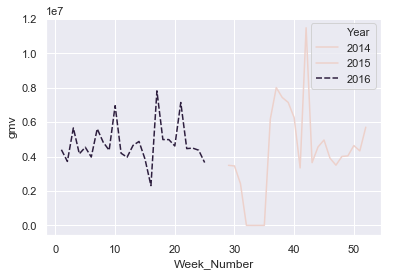

In [132]:
 sns.lineplot(x="Week_Number", y="gmv",hue="Year", style="Year", data=merged_camera)

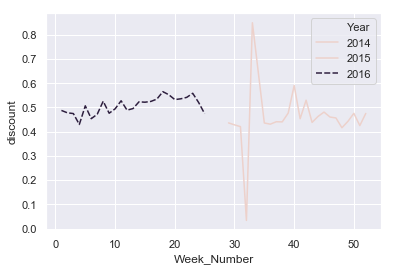

In [133]:
 sns.lineplot(x="Week_Number", y="discount",hue="Year", style="Year", data=merged_camera)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


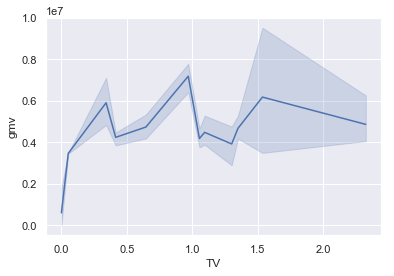

In [134]:
 sns.lineplot(x="TV", y="gmv",data=merged_camera)

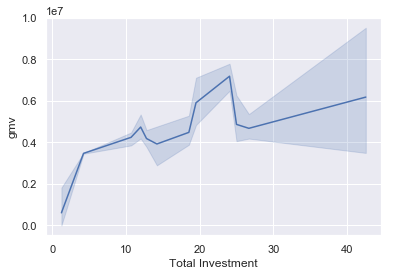

In [135]:
 sns.lineplot(x="Total Investment", y="gmv",data=merged_camera)

### Model Building and Evaluation

In [136]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [137]:
merged_camera3=merged_camera3.drop(['Week_Number', 'Year', 'Month', 'order_id', 'order_item_id','Total Investment','list_price','units'],axis=1)

In [138]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_camera3, train_size=0.7, test_size=0.3, random_state=100)

In [139]:
#Scaling

In [140]:
merged_camera3.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBag',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryCharger',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraHousing',
       'product_analytic_vertical_CameraLEDLight',
       'product_analytic_vertical_CameraMicrophone',
       'product_analytic_vertical_CameraMount',
       'product_analytic_vertical_CameraRemoteControl',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_Filter', 'product_analytic_vertical_Flash',
       'product_analytic_vertical_FlashShoeAdapter',
    

In [141]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBag',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryCharger',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraHousing',
       'product_analytic_vertical_CameraLEDLight',
       'product_analytic_vertical_CameraMicrophone',
       'product_analytic_vertical_CameraMount',
       'product_analytic_vertical_CameraRemoteControl',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_Filter', 'product_analytic_vertical_Flash',
       'product_analytic_vertical_FlashShoeAdapter',
       'product_analytic_vertical_Lens',
       'product_analytic_vertical_ReflectorUmbrella',
       'product_analytic_vertical_Softbox', 'product_analytic_vertical_Strap',
       'product_analytic_vertical_Telescope', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [142]:
# Let's take a look at the train dataframe now
df_train.head()

,gmv,sla,product_mrp,product_procurement_sla,pay_flag,holiday_flag,discount,s1_fact.order_payment_type_Prepaid,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,cold_day,rain_day,snow_day
35,-1.135923,0.242292,-1.212175,0.702747,-0.981198,-0.419382,-0.970929,-0.690181,0.099106,-1.039380,...,-2.239293,-2.347711,-0.648133,-0.518186,-0.514329,2.577503,0.494702,-1.931843,-0.241236,-0.385164
33,-0.072928,0.616024,-0.330826,0.150643,-0.981198,-0.419382,-0.853091,-0.568225,0.350684,0.052005,...,0.817098,0.900440,-0.434818,3.272485,2.944772,-0.602963,-1.364822,1.103910,-1.378491,-0.385164
7,-0.228179,0.544920,-0.127970,0.794305,0.396778,3.476372,-0.450737,-0.360131,-1.058151,-0.106167,...,0.369000,0.555769,-0.305545,-0.518186,-0.514329,-0.625910,0.820723,0.597951,0.896019,-0.385164
45,-0.383320,-0.259896,-0.566873,-0.041239,-0.981198,-0.419382,-0.272428,-0.538375,0.099106,0.020371,...,-1.186698,-1.148254,-0.493569,-0.518186,-0.514329,0.241520,0.349804,-1.425884,-0.241236,-0.385164
20,1.163497,0.491720,0.884000,0.831220,1.734055,-0.419382,-0.837567,0.314466,2.162043,1.586270,...,-0.058046,-0.137594,-0.181574,-0.518186,-0.514329,-0.644307,-0.773155,-1.425884,2.033274,-0.385164


In [143]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [144]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-7.20538771e-02  4.56385546e-01 -7.68163480e-02 -7.13727927e-02
  1.06401606e-02 -8.86702693e-02  3.75082828e-02  1.36192698e-01
  4.95029298e-02  1.77693463e-01 -1.57667657e-02  7.08916119e-03
 -6.18275351e-02 -1.40246783e-01  4.94637716e-02  9.62403584e-03
  6.96565236e-02 -1.52332916e-03 -1.12359175e-01 -2.65594455e-02
 -3.48127135e-02  1.66127602e-01  1.04751223e-01 -1.45571176e-02
  3.59728074e-01  8.44295922e-02  1.21308995e-03 -8.32615659e-02
 -1.29324325e-01 -7.47535000e-02 -4.07694086e-02  1.11080042e-01
  3.37794292e-03 -1.45983091e-02 -2.79934970e-02 -1.58143599e-02
  5.93282328e-02 -3.20674529e-05 -4.42189011e-02  3.13244173e-02
  5.82060618e-02  2.19995853e-02  2.69878380e-02]
3.1698007369316776e-16


In [146]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False  True False  True False False False  True False  True  True False
 False  True False False False False False  True False False False False
  True False False False  True False False  True False False False  True
  True False False False False False False]
[12  1 15  1 27 16  9  1 24  1  1 28  4  1  2 26 10 30  7  1  8 18 13 23
  1  6 31 11  1 14 21  1 29 25 22  1  1 32 19 20  3 17  5]


In [147]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,product_mrp,pay_flag,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBattery,product_analytic_vertical_CameraBatteryCharger,product_analytic_vertical_CameraFilmRolls,product_analytic_vertical_CameraTripod,product_analytic_vertical_Lens,product_analytic_vertical_Telescope,Sponsorship,SEM,Radio
35,1.0,-1.212175,-0.981198,0.099106,-0.785871,-0.814070,-1.414767,-0.554367,-1.235234,-1.238237,-1.210624,-0.648133,-0.518186
33,1.0,-0.330826,-0.981198,0.350684,-0.382695,-0.515356,-0.277901,-0.473462,-0.055713,0.186513,-1.082205,-0.434818,3.272485
7,1.0,-0.127970,0.396778,-1.058151,-0.311546,-0.595013,-0.202110,0.084943,0.217129,-0.383387,-0.673936,-0.305545,-0.518186
45,1.0,-0.566873,-0.981198,0.099106,-0.827375,-0.362680,0.631593,-0.793911,0.141573,0.528452,-0.228644,-0.493569,-0.518186
20,1.0,0.884000,1.734055,2.162043,2.312068,0.301127,-0.353692,0.646522,0.863557,1.782232,1.316435,-0.181574,-0.518186


In [148]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1141.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.30e-25
Time:                        22:09:28   Log-Likelihood:                 60.925
No. Observations:                  33   AIC:                            -95.85
Df Residuals:                      20   BIC:                            -76.40
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [149]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,product_mrp,33.78
8,product_analytic_vertical_Lens,14.46
4,product_analytic_vertical_CameraBattery,9.33
7,product_analytic_vertical_CameraTripod,8.59
5,product_analytic_vertical_CameraBatteryCharger,6.03
9,product_analytic_vertical_Telescope,5.99
11,SEM,5.41
10,Sponsorship,4.83
3,product_analytic_vertical_CameraAccessory,3.46
6,product_analytic_vertical_CameraFilmRolls,2.92


There are still some variables that need to be dropped. Let's start by dropping SEM.

In [151]:
X_train_rfe1.drop('product_mrp', axis = 1, inplace = True)

In [152]:
# Refitting with 11 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     79.64
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.44e-14
Time:                        22:09:28   Log-Likelihood:                 15.126
No. Observations:                  33   AIC:                            -6.251
Df Residuals:                      21   BIC:                             11.71
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,product_analytic_vertical_CameraBattery,8.52
10,SEM,5.40
8,product_analytic_vertical_Telescope,5.39
4,product_analytic_vertical_CameraBatteryCharger,4.99
7,product_analytic_vertical_Lens,4.95
9,Sponsorship,4.74
2,product_analytic_vertical_CameraAccessory,3.30
5,product_analytic_vertical_CameraFilmRolls,2.77
6,product_analytic_vertical_CameraTripod,2.29
1,pay_flag,1.61


In [154]:
# dropping product_analytic_vertical_CameraAccessory
X_train_rfe1.drop('product_analytic_vertical_CameraAccessory', axis = 1, inplace = True)

In [155]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     90.90
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.60e-15
Time:                        22:09:28   Log-Likelihood:                 14.971
No. Observations:                  33   AIC:                            -7.942
Df Residuals:                      22   BIC:                             8.520
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [156]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,product_analytic_vertical_CameraBattery,6.35
7,product_analytic_vertical_Telescope,5.39
9,SEM,5.39
6,product_analytic_vertical_Lens,4.82
8,Sponsorship,4.73
3,product_analytic_vertical_CameraBatteryCharger,4.52
4,product_analytic_vertical_CameraFilmRolls,2.77
5,product_analytic_vertical_CameraTripod,2.28
1,pay_flag,1.56
10,Radio,1.35


In [157]:
# dropping product_analytic_vertical_Telescope
X_train_rfe1.drop('product_analytic_vertical_Telescope', axis = 1, inplace = True)

In [158]:
# Refitting with 9 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 9 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     105.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.59e-16
Time:                        22:09:28   Log-Likelihood:                 14.884
No. Observations:                  33   AIC:                            -9.768
Df Residuals:                      23   BIC:                             5.197
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,product_analytic_vertical_CameraBattery,5.52
8,SEM,4.55
3,product_analytic_vertical_CameraBatteryCharger,4.52
7,Sponsorship,4.16
6,product_analytic_vertical_Lens,4.11
4,product_analytic_vertical_CameraFilmRolls,2.59
5,product_analytic_vertical_CameraTripod,2.27
1,pay_flag,1.55
9,Radio,1.18
0,const,1.00


In [160]:
# dropping NPS
X_train_rfe1.drop('product_analytic_vertical_CameraBatteryCharger', axis = 1, inplace = True)

In [161]:
# Refitting with 8 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.32e-17
Time:                        22:09:28   Log-Likelihood:                 13.300
No. Observations:                  33   AIC:                            -8.600
Df Residuals:                      24   BIC:                             4.868
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [162]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,SEM,4.55
6,Sponsorship,4.15
5,product_analytic_vertical_Lens,4.06
2,product_analytic_vertical_CameraBattery,2.37
4,product_analytic_vertical_CameraTripod,2.23
3,product_analytic_vertical_CameraFilmRolls,2.10
1,pay_flag,1.55
8,Radio,1.08
0,const,1.00


In [163]:
# dropping Sponsorship
X_train_rfe1.drop('product_analytic_vertical_CameraFilmRolls', axis = 1, inplace = True)

In [164]:
# Refitting with 8 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     118.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.43e-17
Time:                        22:09:28   Log-Likelihood:                 11.461
No. Observations:                  33   AIC:                            -6.921
Df Residuals:                      25   BIC:                             5.051
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [165]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,SEM,4.54
5,Sponsorship,4.15
4,product_analytic_vertical_Lens,2.35
2,product_analytic_vertical_CameraBattery,2.21
3,product_analytic_vertical_CameraTripod,2.07
1,pay_flag,1.55
7,Radio,1.07
0,const,1.00


#### Making Predictions for CameraAccessories

In [166]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [167]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [168]:
col1

Index(['product_mrp', 'pay_flag', 'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryCharger',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_Lens', 'product_analytic_vertical_Telescope',
       'Sponsorship', 'SEM', 'Radio'],
      dtype='object')

In [169]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [170]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['product_analytic_vertical_CameraFilmRolls','product_analytic_vertical_CameraBatteryCharger','product_analytic_vertical_Telescope','product_analytic_vertical_CameraAccessory','product_mrp'], axis = 1)

In [171]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 6 to 43
Data columns (total 8 columns):
const                                      15 non-null float64
pay_flag                                   15 non-null float64
product_analytic_vertical_CameraBattery    15 non-null float64
product_analytic_vertical_CameraTripod     15 non-null float64
product_analytic_vertical_Lens             15 non-null float64
Sponsorship                                15 non-null float64
SEM                                        15 non-null float64
Radio                                      15 non-null float64
dtypes: float64(8)
memory usage: 1.1 KB


In [172]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

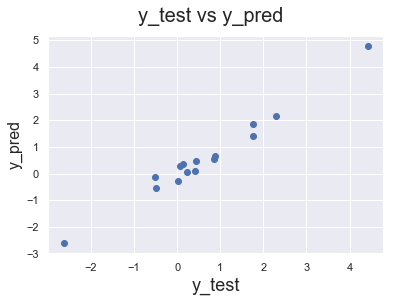

In [173]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [174]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9750761304004426

#### For Camera accessories, the linear model with 6 variables, the r-squared on training and test data is about 91,9% and 97.1% respectively. The adjusted r-squared on the train set is about is about 96.3%.

##### Filtering the data for Home Audio

In [175]:
df_homeaudio=df_new[df_new.product_analytic_sub_category.isin(['HomeAudio'])]

In [176]:
df_homeaudio.shape

(123727, 19)

In [177]:
# Subset all categorical variables
df_categorical = df_homeaudio.select_dtypes(include=['object'])
df_categorical.head()

,s1_fact.order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical
2840,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
2841,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
2842,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
2843,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
2844,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker


In [178]:
df_homeaudio.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv',
       'units', 's1_fact.order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'Week_Number', 'pay_flag', 'holiday_flag', 'list_price', 'discount'],
      dtype='object')

In [179]:
# Convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,s1_fact.order_payment_type_Prepaid,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,product_analytic_vertical_VoiceRecorder
2840,1,0,0,0,0,0,1,0,0,0,0
2841,1,0,0,0,0,0,1,0,0,0,0
2842,1,0,0,0,0,0,1,0,0,0,0
2843,1,0,0,0,0,0,1,0,0,0,0
2844,0,0,0,0,0,0,1,0,0,0,0


In [180]:
# Drop categorical variable columns
df_homeaudio = df_homeaudio.drop(list(df_categorical.columns), axis=1)

In [181]:
# Concatenate dummy variables with X
df_homeaudio = pd.concat([df_homeaudio, df_dummies], axis=1)

In [182]:
# Let's check the first few rows
df_homeaudio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,...,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,product_analytic_vertical_VoiceRecorder
2840,2015-10-03,2015,10,1.407396e+15,1.407396e+15,7049.0,1,5,7499,5,...,0,0,0,0,0,1,0,0,0,0
2841,2015-10-16,2015,10,2.418214e+15,2.418214e+15,5489.0,1,2,7499,5,...,0,0,0,0,0,1,0,0,0,0
2842,2015-10-16,2015,10,2.418676e+15,2.418676e+15,6255.0,1,9,7499,5,...,0,0,0,0,0,1,0,0,0,0
2843,2015-10-16,2015,10,1.418727e+15,1.418727e+15,6099.0,1,3,7499,5,...,0,0,0,0,0,1,0,0,0,0
2844,2015-10-20,2015,10,2.421984e+15,2.421984e+15,6850.0,1,9,7499,5,...,0,0,0,0,0,1,0,0,0,0


In [183]:
df_homeaudio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123727 entries, 2840 to 1647205
Data columns (total 26 columns):
order_date                                    123727 non-null datetime64[ns]
Year                                          123727 non-null int64
Month                                         123727 non-null int64
order_id                                      123727 non-null float64
order_item_id                                 123727 non-null float64
gmv                                           123727 non-null float64
units                                         123727 non-null int64
sla                                           123727 non-null int64
product_mrp                                   123727 non-null int64
product_procurement_sla                       123727 non-null int64
Week_Number                                   123727 non-null int64
pay_flag                                      123727 non-null int8
holiday_flag                                  123727 no

In [184]:
df_Home_week=df_homeaudio.groupby('Week_Number',as_index=False, sort=False).agg({
                         'Year':'max', 
                         'Month':'max', 
                         'order_id': 'count',
'order_item_id':'count',
'gmv':'sum',
'units':'sum',
'sla':'mean',
'product_mrp':'sum',
'product_procurement_sla':'mean',
'pay_flag':'sum',
'holiday_flag':'sum',
'list_price':'sum',
'discount':'mean',
's1_fact.order_payment_type_Prepaid':'sum',
'product_analytic_vertical_DJController':'sum',      
'product_analytic_vertical_Dock':'sum',              
'product_analytic_vertical_DockingStation':'sum',          
'product_analytic_vertical_FMRadio':'sum',   
'product_analytic_vertical_HiFiSystem':'sum',       
'product_analytic_vertical_HomeAudioSpeaker':'sum',         
'product_analytic_vertical_KaraokePlayer':'sum',         
'product_analytic_vertical_SlingBox':'sum',           
'product_analytic_vertical_SoundMixer':'sum',          
'product_analytic_vertical_SoundMixer':'sum',        
})

In [185]:
df_Home_week.head()

,Week_Number,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,...,s1_fact.order_payment_type_Prepaid,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer
0,40,2015,10,3075,3075,5917495.0,3108,6.279675,9864972,2.489431,...,692.0,4,75,1,933.0,43,1813.0,0,0,0
1,42,2015,10,7861,7861,15420826.0,7928,5.969342,28875948,2.338634,...,1910.0,2,154,4,1334.0,76,6040.0,1,0,0
2,43,2015,10,2495,2495,4899708.0,2523,6.621643,8181546,2.613627,...,461.0,0,67,4,662.0,38,1615.0,0,0,0
3,44,2015,11,2905,2905,5750336.0,2939,6.535972,9559703,2.496386,...,519.0,1,50,4,713.0,50,1958.0,0,0,0
4,41,2015,10,1879,1879,3558275.0,1914,5.957956,5797961,2.598191,...,384.0,2,66,4,601.0,22,1065.0,0,1,0


In [186]:
# merge media inestment data with HomeAudio sales data
merged_Home = df_Home_week.merge(df_media, on=['Year', 'Month'])

In [187]:
# merge climate data with HomeAudio sales data
merged_Home2 = merged_Home.merge(df_media_nps1, on=['Month','Year'])

In [188]:
# merge NPS and Stock Index data with CameraAccessory sales data
merged_Home3 = merged_Home2.merge(df_climate_week, on=['Month','Year','Week_Number'])

In [189]:
# Final data set for HomeAudio
merged_Home3.head()

,Week_Number,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,cold_day,rain_day,snow_day
0,40,2015,10,3075,3075,5917495.0,3108,6.279675,9864972,2.489431,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,3,2,0
1,42,2015,10,7861,7861,15420826.0,7928,5.969342,28875948,2.338634,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,6,1,0
2,43,2015,10,2495,2495,4899708.0,2523,6.621643,8181546,2.613627,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,2,1,0
3,41,2015,10,1879,1879,3558275.0,1914,5.957956,5797961,2.598191,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,2,0,0
4,44,2015,11,2905,2905,5750336.0,2939,6.535972,9559703,2.496386,...,4.890394,1.648942,1.305508,0.0,0.0,47.000000,308.25,6,1,0


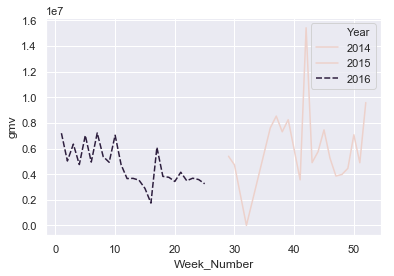

In [190]:
sns.lineplot(x="Week_Number", y="gmv",hue="Year", style="Year", data=merged_Home3)

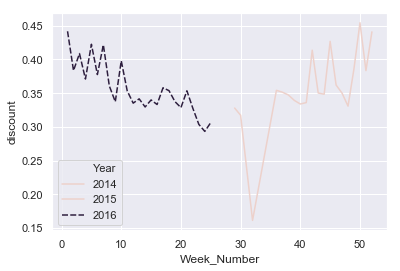

In [191]:
 sns.lineplot(x="Week_Number", y="discount",hue="Year", style="Year", data=merged_Home3)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


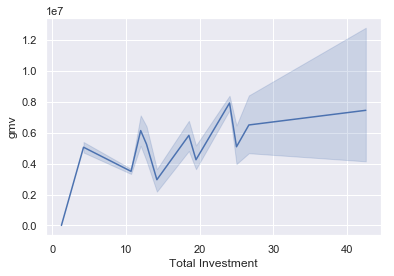

In [192]:
sns.lineplot(x="Total Investment", y="gmv",data=merged_Home3)

### Model Building (Linear regression )and Evaluation for HomeAudio

In [193]:
merged_Home3=merged_Home3.drop(['Week_Number', 'Year', 'Month', 'order_id', 'order_item_id','Total Investment','list_price','units'],axis=1)

In [194]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_Home3, train_size=0.7, test_size=0.3, random_state=100)

In [195]:
merged_Home3.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_Dock',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_FMRadio',
       'product_analytic_vertical_HiFiSystem',
       'product_analytic_vertical_HomeAudioSpeaker',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SlingBox',
       'product_analytic_vertical_SoundMixer', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day'],
      dtype='object')

In [196]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv',  'sla', 'product_mrp', 'product_procurement_sla',
       'pay_flag', 'holiday_flag', 'discount',
       's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_Dock',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_FMRadio',
       'product_analytic_vertical_HiFiSystem',
       'product_analytic_vertical_HomeAudioSpeaker',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SlingBox',
       'product_analytic_vertical_SoundMixer', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [197]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [198]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-6.75874775e-01 -2.58073252e+01  1.64815140e+00  6.33282061e-01
  3.47623520e-02  4.87493811e+00  6.70349571e+00  1.30096010e+00
 -7.57733713e+00  1.25227075e+00 -2.06005063e+00  7.05569766e-01
  2.33295676e+01  5.32043552e-01 -1.44224228e-01  1.20667148e+00
  1.01246270e+02 -4.03085170e+02 -1.37980242e+02  3.32333194e+02
  3.26853397e+02 -4.35362134e+02  8.27431830e+01 -2.80796507e+02
  1.80390204e+02 -3.90317440e+01  4.82103678e+01 -3.09177485e+00
 -1.17168379e+00  6.33677856e-01]
-1.9037715736300003e-13


In [200]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False  True False False False  True False False False False  True False
  True False False False  True  True  True  True  True  True  True False
 False False  True False False False]
[17  1  7 14 19  1  8  9  6 13  1 16  1  5 18 10  1  1  1  1  1  1  1  4
  3  2  1 11 12 15]


In [201]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,product_mrp,discount,product_analytic_vertical_FMRadio,product_analytic_vertical_HomeAudioSpeaker,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Stock_Index
20,1.0,1.811389,2.107711,-0.504560,1.652078,0.891794,0.175569,1.002812,0.294873,0.659576,0.575407,0.389167,-1.678798
7,1.0,-0.651278,-0.729605,-0.477188,-0.492149,0.287860,-0.351575,-0.711438,-0.669897,0.163302,0.439737,-0.354559,0.864644
42,1.0,0.489207,-0.301909,1.931583,0.405946,0.112805,-0.327676,1.247948,-0.195755,-0.373353,-0.474329,-0.232233,-0.857070
18,1.0,-0.117832,0.627125,-0.481098,-0.157113,0.891794,0.175569,1.002812,0.294873,0.659576,0.575407,0.389167,-1.678798
21,1.0,-0.691955,-0.138339,-0.438085,-0.611161,-1.174993,-0.500609,-0.005805,-0.002829,0.852920,0.559598,-0.143888,0.799427


In [202]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1285.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.95e-24
Time:                        22:09:34   Log-Likelihood:                 60.698
No. Observations:                  31   AIC:                            -95.40
Df Residuals:                      18   BIC:                            -76.75
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [203]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [204]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Online marketing,370.14
10,Affiliates,350.54
1,product_mrp,321.34
4,product_analytic_vertical_HomeAudioSpeaker,221.79
11,SEM,180.09
6,Digital,150.59
8,Content Marketing,85.81
2,discount,19.38
5,TV,18.09
7,Sponsorship,16.16


In [205]:
X_train_rfe1.drop('Content Marketing', axis = 1, inplace = True)

In [206]:
# Refitting with 11 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1396.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.45e-25
Time:                        22:09:34   Log-Likelihood:                 59.805
No. Observations:                  31   AIC:                            -95.61
Df Residuals:                      19   BIC:                            -78.40
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [207]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Online marketing,350.65
9,Affiliates,349.19
1,product_mrp,302.54
4,product_analytic_vertical_HomeAudioSpeaker,205.36
10,SEM,163.63
6,Digital,119.00
2,discount,18.81
5,TV,15.58
7,Sponsorship,14.07
3,product_analytic_vertical_FMRadio,7.24


In [208]:
# dropping Affiliates
X_train_rfe1.drop(' Affiliates', axis = 1, inplace = True)

In [209]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1615.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.33e-27
Time:                        22:09:34   Log-Likelihood:                 59.793
No. Observations:                  31   AIC:                            -97.59
Df Residuals:                      20   BIC:                            -81.81
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [210]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,product_mrp,288.87
4,product_analytic_vertical_HomeAudioSpeaker,193.48
9,SEM,139.61
6,Digital,109.86
2,discount,18.77
8,Online marketing,10.38
7,Sponsorship,8.47
3,product_analytic_vertical_FMRadio,7.24
5,TV,3.39
10,Stock_Index,2.57


In [211]:
# dropping Online marketing
X_train_rfe1.drop('product_mrp', axis = 1, inplace = True)

In [212]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     823.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.07e-24
Time:                        22:09:34   Log-Likelihood:                 46.988
No. Observations:                  31   AIC:                            -73.98
Df Residuals:                      21   BIC:                            -59.64
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [213]:
# dropping product_procurement_sla
X_train_rfe1.drop('Digital', axis = 1, inplace = True)

In [214]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     970.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.31e-26
Time:                        22:09:34   Log-Likelihood:                 46.985
No. Observations:                  31   AIC:                            -75.97
Df Residuals:                      22   BIC:                            -63.06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [215]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,product_analytic_vertical_HomeAudioSpeaker,7.15
1,discount,6.45
5,Sponsorship,4.77
7,SEM,4.51
2,product_analytic_vertical_FMRadio,3.78
6,Online marketing,2.59
4,TV,2.02
8,Stock_Index,2.00
0,const,1.00


In [216]:
# dropping Stock_Index
X_train_rfe1.drop('Stock_Index', axis = 1, inplace = True)

In [217]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1092.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.84e-27
Time:                        22:09:35   Log-Likelihood:                 46.058
No. Observations:                  31   AIC:                            -76.12
Df Residuals:                      23   BIC:                            -64.64
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [218]:
# dropping Stock_Index
X_train_rfe1.drop('TV', axis = 1, inplace = True)

In [219]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1297.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.44e-29
Time:                        22:09:35   Log-Likelihood:                 45.678
No. Observations:                  31   AIC:                            -77.36
Df Residuals:                      24   BIC:                            -67.32
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [220]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,product_analytic_vertical_HomeAudioSpeaker,6.99
1,discount,5.58
4,Sponsorship,3.96
6,SEM,3.76
2,product_analytic_vertical_FMRadio,3.67
5,Online marketing,2.33
0,const,1.00


#### Making prediction for HomeAudio

In [221]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [222]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [223]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [224]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['TV','Stock_Index','Digital','product_mrp',' Affiliates','Content Marketing'], axis = 1)

In [225]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 6 to 33
Data columns (total 7 columns):
const                                         14 non-null float64
discount                                      14 non-null float64
product_analytic_vertical_FMRadio             14 non-null float64
product_analytic_vertical_HomeAudioSpeaker    14 non-null float64
Sponsorship                                   14 non-null float64
Online marketing                              14 non-null float64
SEM                                           14 non-null float64
dtypes: float64(7)
memory usage: 896.0 bytes


In [226]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

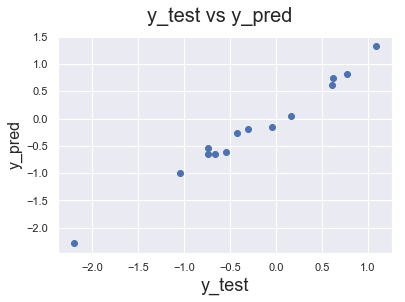

In [227]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [228]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9805226118106517

#### For Home Audio , the linear model with 6 variables, the r-squared on training and test data is about 99,7% and 98% respectively. The adjusted r-squared on the train set is about is about 99.7%.

#### Filtering the data for GamingAccessory 

In [229]:
df_game=df_new[df_new.product_analytic_sub_category.isin(['GamingAccessory'])]

In [230]:
df_game.shape

(200954, 19)

In [231]:
# Subset all categorical variables
df_categorical = df_game.select_dtypes(include=['object'])
df_categorical.head()

,s1_fact.order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical
1598,COD,GamingHardware,GamingAccessory,GamePad
1599,COD,GamingHardware,GamingAccessory,GamePad
1600,Prepaid,GamingHardware,GamingAccessory,GamePad
1601,Prepaid,GamingHardware,GamingAccessory,GamePad
1602,Prepaid,GamingHardware,GamingAccessory,GamePad


In [232]:
df_game.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv',
       'units', 's1_fact.order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'Week_Number', 'pay_flag', 'holiday_flag', 'list_price', 'discount'],
      dtype='object')

In [233]:
# Convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,s1_fact.order_payment_type_Prepaid,product_analytic_vertical_GameControlMount,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,product_analytic_vertical_GamingAdapter,product_analytic_vertical_GamingChargingStation,product_analytic_vertical_GamingGun,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,product_analytic_vertical_GamingMousePad,product_analytic_vertical_GamingSpeaker,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_MotionController,product_analytic_vertical_TVOutCableAccessory
1598,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1599,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1600,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1601,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1602,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [234]:
# Drop categorical variable columns
df_game = df_game.drop(list(df_categorical.columns), axis=1)

In [235]:
# Concatenate dummy variables with X
df_game = pd.concat([df_game, df_dummies], axis=1)

In [236]:
# Let's check the first few rows
df_game.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,...,product_analytic_vertical_GamingGun,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,product_analytic_vertical_GamingMousePad,product_analytic_vertical_GamingSpeaker,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_MotionController,product_analytic_vertical_TVOutCableAccessory
1598,2015-10-04,2015,10,1.408217e+15,1.408217e+15,3075.0,1,9,3999,5,...,0,0,0,0,0,0,0,0,0,0
1599,2015-10-14,2015,10,1.416985e+15,1.416985e+15,2750.0,1,7,3999,5,...,0,0,0,0,0,0,0,0,0,0
1600,2015-10-15,2015,10,1.417669e+15,1.417669e+15,2899.0,1,5,3999,5,...,0,0,0,0,0,0,0,0,0,0
1601,2015-10-17,2015,10,1.419415e+15,1.419415e+15,2609.0,1,5,3999,5,...,0,0,0,0,0,0,0,0,0,0
1602,2015-10-26,2015,10,1.427168e+15,1.427168e+15,2772.0,1,5,3999,5,...,0,0,0,0,0,0,0,0,0,0


In [237]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200954 entries, 1598 to 1613079
Data columns (total 31 columns):
order_date                                         200954 non-null datetime64[ns]
Year                                               200954 non-null int64
Month                                              200954 non-null int64
order_id                                           200954 non-null float64
order_item_id                                      200954 non-null float64
gmv                                                200954 non-null float64
units                                              200954 non-null int64
sla                                                200954 non-null int64
product_mrp                                        200954 non-null int64
product_procurement_sla                            200954 non-null int64
Week_Number                                        200954 non-null int64
pay_flag                                           200954 non-null 

In [238]:
df_game_week=df_game.groupby('Week_Number',as_index=False, sort=False).agg({
                         'Year':'max', 
                         'Month':'max', 
                         'order_id': 'count',
'order_item_id':'count',
'gmv':'sum',
'units':'sum',
'sla':'mean',
'product_mrp':'sum',
'product_procurement_sla':'mean',
'pay_flag':'sum',
'holiday_flag':'sum',
'list_price':'sum',
'discount':'mean',
's1_fact.order_payment_type_Prepaid':'sum',
'product_analytic_vertical_GameControlMount':'sum',      
'product_analytic_vertical_GamePad':'sum',              
'product_analytic_vertical_GamingAccessoryKit':'sum',          
'product_analytic_vertical_GamingChargingStation':'sum',   
'product_analytic_vertical_GamingGun':'sum',       
'product_analytic_vertical_GamingHeadset':'sum',         
'product_analytic_vertical_GamingKeyboard':'sum',         
'product_analytic_vertical_GamingMouse':'sum',           
'product_analytic_vertical_GamingMousePad':'sum',          
'product_analytic_vertical_GamingSpeaker':'sum',
'product_analytic_vertical_JoystickGamingWheel':'sum',           
'product_analytic_vertical_MotionController':'sum',          
'product_analytic_vertical_TVOutCableAccessory':'sum'      
})

In [239]:
df_game_week.shape

(53, 28)

In [240]:
# merge media inestment data with GamingAccessory sales data
merged_game = df_game_week.merge(df_media, on=['Year', 'Month'])

In [241]:
# merge climate data with GamingAccessory sales data
merged_game2 = merged_game.merge(df_media_nps1, on=['Month','Year'])

In [242]:
 #merge NPS and Stock Index data with GamingAccessory sales data
merged_game3 = merged_game2.merge(df_climate_week, on=['Month','Year','Week_Number'])

In [243]:
# Final data set for GamingAccessory
merged_game3.head()

,Week_Number,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,cold_day,rain_day,snow_day
0,40,2015,10,3808,3808,3.653201e+06,3920,5.793067,9681029,2.667017,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,3,2,0
1,42,2015,10,11259,11259,7.386666e+06,11677,5.227995,53121250,3.454037,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,6,1,0
2,43,2015,10,2772,2772,2.351632e+06,2844,6.129509,4519389,2.503968,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,2,1,0
3,41,2015,10,2355,2355,2.087986e+06,2462,5.515499,4601818,2.498938,...,6.092944,1.743428,7.981753,0.0,0.0,44.398389,302.50,2,0,0
4,44,2015,11,3814,3814,2.851994e+06,3966,5.821972,6457681,2.173047,...,4.890394,1.648942,1.305508,0.0,0.0,47.000000,308.25,6,1,0


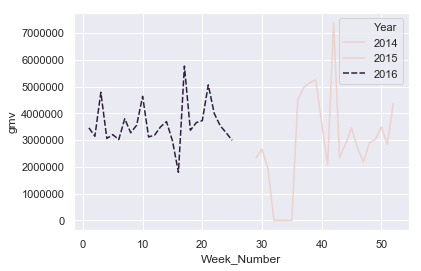

In [244]:
sns.lineplot(x="Week_Number", y="gmv",hue="Year", style="Year", data=merged_game3)

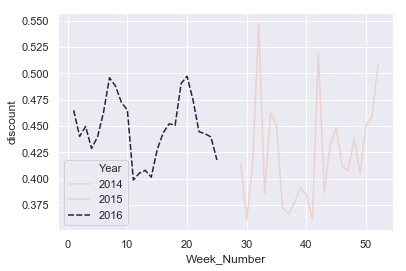

In [245]:
 sns.lineplot(x="Week_Number", y="discount",hue="Year", style="Year", data=merged_game3)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


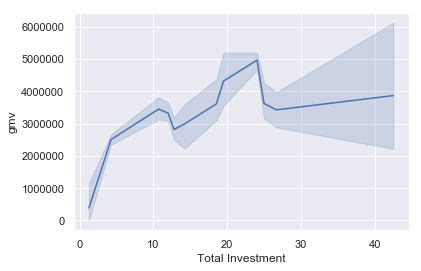

In [246]:
sns.lineplot(x="Total Investment", y="gmv",data=merged_game3)

### Model Building (Linear regression )and Evaluation for GamingAccessory

In [247]:
merged_game3=merged_game3.drop(['Week_Number', 'Year', 'Month', 'order_id', 'order_item_id','Total Investment','discount','units','list_price','product_mrp'],axis=1)

In [248]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_game3, train_size=0.7, test_size=0.3, random_state=100)

In [249]:
merged_game3.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'pay_flag', 'holiday_flag',
       's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_GameControlMount',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingChargingStation',
       'product_analytic_vertical_GamingGun',
       'product_analytic_vertical_GamingHeadset',
       'product_analytic_vertical_GamingKeyboard',
       'product_analytic_vertical_GamingMouse',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_GamingSpeaker',
       'product_analytic_vertical_JoystickGamingWheel',
       'product_analytic_vertical_MotionController',
       'product_analytic_vertical_TVOutCableAccessory', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day',
       'snow_day'],
      dtype='ob

In [250]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv','sla',  'product_procurement_sla',
       'pay_flag', 'holiday_flag',
       's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_GameControlMount',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingChargingStation',
       'product_analytic_vertical_GamingGun',
       'product_analytic_vertical_GamingHeadset',
       'product_analytic_vertical_GamingKeyboard',
       'product_analytic_vertical_GamingMouse',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_GamingSpeaker',
       'product_analytic_vertical_JoystickGamingWheel',
       'product_analytic_vertical_MotionController',
       'product_analytic_vertical_TVOutCableAccessory', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day',
       'snow_day']
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [251]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [252]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [253]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.72453523e-02  4.81034080e-03 -1.36614375e-02  1.97482341e-02
  2.09899068e-02 -2.21077292e-02  2.39732138e-01  3.16006145e-01
  1.62258863e-01 -1.89420162e-01  2.61512088e-01 -8.81416280e-02
  4.73423216e-01  4.13688102e-02  7.59887666e-03  5.32594273e-02
  4.66525157e-02  1.85687699e-01  1.95251390e+01  1.85808905e+01
 -7.81970790e+00  1.86528041e+01  1.72715446e+01 -2.94621298e+01
 -3.93870650e+01  2.92800562e+01 -3.68351927e+01 -7.16912453e+00
 -2.20964411e-01 -7.18955419e-02  2.34526116e-02 -7.31382578e-02]
-1.573407180618104e-14


In [254]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False False False False False False False False False  True False False
  True False False False False False  True  True  True  True  True  True
  True  True  True  True False False False False]
[16 21 13 19 18 15  3  2  7  1  6 17  1 12 20  9 10  5  1  1  1  1  1  1
  1  1  1  1  4 11 14  8]


In [255]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,product_analytic_vertical_GamingGun,product_analytic_vertical_GamingMouse,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS
25,1.0,-0.174078,0.481419,2.009562,-0.113567,0.377468,-0.364284,0.257047,0.431868,-0.306046,0.537297,1.300303,-0.100062
36,1.0,-0.174078,-0.187143,0.577165,0.185402,0.960604,0.396965,0.770499,0.685517,0.460612,-0.543876,-0.544481,-0.831087
17,1.0,-0.174078,0.347707,-0.901115,-0.526319,-0.004849,0.094230,0.915248,0.674303,-0.086269,0.823124,0.032478,-0.489028
7,1.0,-0.174078,0.372297,0.145198,-0.369452,-0.680284,-0.584116,0.398956,0.589277,-0.302404,-0.543876,-0.544481,-0.558702
46,1.0,-0.174078,-1.090855,-1.401605,-0.368644,-1.186006,-0.768205,-2.054985,-2.125973,-0.649213,-0.543876,-0.544481,2.389206


In [256]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     37.79
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.79e-11
Time:                        22:09:41   Log-Likelihood:                 4.7584
No. Observations:                  34   AIC:                             16.48
Df Residuals:                      21   BIC:                             36.33
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [257]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [258]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,SEM,2880628.49
11,Other,2370314.55
8,Affiliates,1830763.99
10,Radio,1456318.13
3,TV,714269.55
6,Content Marketing,692525.50
7,Online marketing,666058.13
4,Digital,590867.53
5,Sponsorship,122917.50
12,NPS,109916.33


In [259]:
X_train_rfe1.drop('SEM', axis = 1, inplace = True)

In [260]:
# Refitting with 11 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     40.57
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.02e-12
Time:                        22:09:42   Log-Likelihood:                 3.7406
No. Observations:                  34   AIC:                             16.52
Df Residuals:                      22   BIC:                             34.84
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [261]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Affiliates,1032.18
7,Online marketing,823.12
10,Other,172.50
6,Content Marketing,170.22
9,Radio,145.87
4,Digital,122.84
3,TV,85.74
5,Sponsorship,67.38
11,NPS,30.90
2,product_analytic_vertical_GamingMouse,24.31


In [262]:
# dropping Affiliates
X_train_rfe1.drop(' Affiliates', axis = 1, inplace = True)

In [263]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     46.62
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.12e-13
Time:                        22:09:42   Log-Likelihood:                 3.7308
No. Observations:                  34   AIC:                             14.54
Df Residuals:                      23   BIC:                             31.33
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [264]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Other,168.38
6,Content Marketing,142.72
8,Radio,119.45
4,Digital,94.61
3,TV,58.78
7,Online marketing,52.02
2,product_analytic_vertical_GamingMouse,21.78
1,product_analytic_vertical_GamingGun,20.87
5,Sponsorship,20.09
10,NPS,13.67


In [265]:
# dropping Online marketing
X_train_rfe1.drop('NPS', axis = 1, inplace = True)

In [266]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     52.49
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.30e-13
Time:                        22:09:42   Log-Likelihood:                 3.2538
No. Observations:                  34   AIC:                             13.49
Df Residuals:                      24   BIC:                             28.76
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [267]:
# dropping Online marketing
X_train_rfe1.drop('Digital', axis = 1, inplace = True)

In [268]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     57.41
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.55e-14
Time:                        22:09:42   Log-Likelihood:                 2.1417
No. Observations:                  34   AIC:                             13.72
Df Residuals:                      25   BIC:                             27.45
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [269]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Other,140.04
7,Radio,116.05
3,TV,30.61
2,product_analytic_vertical_GamingMouse,16.83
1,product_analytic_vertical_GamingGun,16.75
6,Online marketing,14.00
4,Sponsorship,6.28
5,Content Marketing,4.54
0,const,1.00


In [270]:
# dropping Other
X_train_rfe1.drop('Other', axis = 1, inplace = True)

In [271]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     42.50
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.21e-12
Time:                        22:09:42   Log-Likelihood:                -5.3847
No. Observations:                  34   AIC:                             26.77
Df Residuals:                      26   BIC:                             38.98
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [272]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,product_analytic_vertical_GamingMouse,15.75
1,product_analytic_vertical_GamingGun,15.62
5,Content Marketing,4.27
4,Sponsorship,4.19
6,Online marketing,3.88
3,TV,2.03
7,Radio,1.89
0,const,1.00


In [273]:
# dropping Other
X_train_rfe1.drop('Online marketing', axis = 1, inplace = True)

In [274]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     51.30
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.67e-13
Time:                        22:09:42   Log-Likelihood:                -5.4439
No. Observations:                  34   AIC:                             24.89
Df Residuals:                      27   BIC:                             35.57
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [275]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,product_analytic_vertical_GamingMouse,9.88
1,product_analytic_vertical_GamingGun,9.76
4,Sponsorship,4.12
5,Content Marketing,3.03
3,TV,1.81
6,Radio,1.79
0,const,1.00


#### Making prediction for GamingAccessories

In [276]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [277]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [278]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [279]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['Online marketing','Other','Digital','NPS',' Affiliates','SEM'], axis = 1)

In [280]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 6 to 35
Data columns (total 7 columns):
const                                    15 non-null float64
product_analytic_vertical_GamingGun      15 non-null float64
product_analytic_vertical_GamingMouse    15 non-null float64
TV                                       15 non-null float64
Sponsorship                              15 non-null float64
Content Marketing                        15 non-null float64
Radio                                    15 non-null float64
dtypes: float64(7)
memory usage: 960.0 bytes


In [281]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

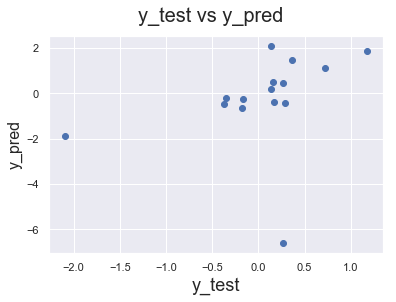

In [282]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [592]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.57177221847921

#### For Gaming accessories, the linear model with 6 variables, the r-squared on training and test data is about 91,9% and 87% respectively. The adjusted r-squared on the train set is about is about 90%.

### Logarithmic Model

#### CameraAccessory

In [284]:
# Taking logarithmic transormation on CameraAccessories data
merged_camera_log = (np.log(merged_camera3.astype(float))).replace(-np.inf, 0)


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [285]:
merged_camera3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 44 columns):
gmv                                               48 non-null float64
sla                                               48 non-null float64
product_mrp                                       48 non-null int64
product_procurement_sla                           48 non-null float64
pay_flag                                          48 non-null float64
holiday_flag                                      48 non-null float64
discount                                          48 non-null float64
s1_fact.order_payment_type_Prepaid                48 non-null float64
product_analytic_vertical_CameraAccessory         48 non-null uint8
product_analytic_vertical_CameraBag               48 non-null float64
product_analytic_vertical_CameraBattery           48 non-null float64
product_analytic_vertical_CameraBatteryCharger    48 non-null float64
product_analytic_vertical_CameraBatteryGrip       48 non-null

In [286]:
merged_camera_log.head()

,gmv,sla,product_mrp,product_procurement_sla,pay_flag,holiday_flag,discount,s1_fact.order_payment_type_Prepaid,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,cold_day,rain_day,snow_day
0,16.256324,1.847497,16.986038,1.099761,6.957497,8.993303,-0.634997,8.039157,4.276666,6.824374,...,1.807131,0.555853,2.077158,0.0,0.0,3.793203,5.712081,1.791759,0.000000,0.0
1,15.109552,1.943163,15.725618,1.012809,0.000000,0.000000,-0.825142,6.628041,3.806662,5.683580,...,1.807131,0.555853,2.077158,0.0,0.0,3.793203,5.712081,0.693147,0.000000,0.0
2,15.021543,1.836535,15.689147,0.998333,0.000000,0.000000,-0.790839,6.677083,3.688879,5.476464,...,1.807131,0.555853,2.077158,0.0,0.0,3.793203,5.712081,0.693147,0.000000,0.0
3,15.649815,1.704307,16.559435,0.931125,6.082219,0.000000,-0.526520,7.303170,4.143135,5.863631,...,1.807131,0.555853,2.077158,0.0,0.0,3.793203,5.712081,1.098612,0.693147,0.0
4,15.332778,1.875407,15.998605,1.087764,6.248043,0.000000,-0.770306,6.918695,3.737670,5.828946,...,1.587273,0.500134,0.266592,0.0,0.0,3.850148,5.730911,1.791759,0.000000,0.0


In [287]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_camera_log, train_size=0.7, test_size=0.3, random_state=100)

In [288]:
merged_camera3.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBag',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryCharger',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraHousing',
       'product_analytic_vertical_CameraLEDLight',
       'product_analytic_vertical_CameraMicrophone',
       'product_analytic_vertical_CameraMount',
       'product_analytic_vertical_CameraRemoteControl',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_Filter', 'product_analytic_vertical_Flash',
       'product_analytic_vertical_FlashShoeAdapter',
    

In [289]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBag',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryCharger',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraHousing',
       'product_analytic_vertical_CameraLEDLight',
       'product_analytic_vertical_CameraMicrophone',
       'product_analytic_vertical_CameraMount',
       'product_analytic_vertical_CameraRemoteControl',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_Filter', 'product_analytic_vertical_Flash',
       'product_analytic_vertical_FlashShoeAdapter',
       'product_analytic_vertical_Lens',
       'product_analytic_vertical_ReflectorUmbrella',
       'product_analytic_vertical_Softbox', 'product_analytic_vertical_Strap',
       'product_analytic_vertical_Telescope', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(key, value)


In [290]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [291]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [292]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 4.18695442e-02  4.79659765e-01  1.59416191e-02 -1.64770568e-02
 -1.72701350e-02 -4.43478551e-02 -1.04274677e-02 -1.10448392e-01
 -6.06961438e-02  4.34892655e-02  5.15842838e-02  1.26784613e-02
 -2.08793275e-02 -4.34389825e-02  1.89360069e-02  8.60422844e-16
 -4.55333841e-02 -6.28034173e-02  8.84233117e-02  2.50425673e-01
 -7.44357356e-03 -1.53353010e-01  1.14412556e-01 -2.35922393e-16
  3.16295240e-01 -2.07835684e-02 -1.44736942e-03  3.55983464e-02
  1.11314111e-02 -6.08804402e-02  2.82558677e-02  1.75042313e-02
  1.34834816e-01  1.18740462e-01  6.05634039e-02 -2.79491684e-02
 -1.38597120e-02  2.65108083e-02  2.27873672e-01 -3.61065889e-02
 -3.52024072e-02 -1.67694739e-02 -1.01247379e-02]
1.0653001656938212e-16


In [293]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 10)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False  True False False False  True  True False  True False False False
 False False False False False False False  True False  True False False
  True False False  True False  True False False False False False False
 False False  True False False False False]
[28  1 18 12 19  1  1  8  1 22 11 30 14  6 13 33 10 24  9  1 31  1  5 34
  1 25 32  1 21  1 26  2 16 20  3 15  7  4  1 23 17 27 29]


In [294]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,product_mrp,discount,s1_fact.order_payment_type_Prepaid,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraTripod,product_analytic_vertical_Filter,product_analytic_vertical_Lens,product_analytic_vertical_Strap,TV,NPS
35,1.0,-0.119399,-1.157534,-0.209834,-0.138898,-0.122968,-0.280957,-0.242329,-0.228381,-2.924348,2.488402
33,1.0,0.164290,-0.997142,-0.079960,0.245583,-0.038615,0.164881,0.214370,0.142242,0.410076,-0.607012
7,1.0,0.212679,-0.473730,0.092907,0.201199,0.356814,0.412315,0.288673,0.106611,0.391128,-0.632305
45,1.0,0.101838,-0.252846,-0.051963,0.236925,-0.467326,0.084810,0.268851,0.364257,-0.085083,0.290624
20,1.0,0.404472,-0.976262,0.452065,0.573841,0.601305,0.573394,0.439110,-0.007617,0.348045,-0.652618


In [295]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     8533.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.55e-37
Time:                        22:09:44   Log-Likelihood:                 89.523
No. Observations:                  33   AIC:                            -157.0
Df Residuals:                      22   BIC:                            -140.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [296]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [297]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,product_mrp,586.20
4,product_analytic_vertical_CameraBag,286.33
6,product_analytic_vertical_Filter,184.94
5,product_analytic_vertical_CameraTripod,100.94
7,product_analytic_vertical_Lens,100.72
8,product_analytic_vertical_Strap,37.14
3,s1_fact.order_payment_type_Prepaid,36.11
9,TV,13.59
10,NPS,12.68
2,discount,2.58


In [298]:
X_train_rfe1.drop('product_mrp', axis = 1, inplace = True)

In [299]:
# Refitting with 11 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1791.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.52e-30
Time:                        22:09:45   Log-Likelihood:                 61.308
No. Observations:                  33   AIC:                            -102.6
Df Residuals:                      23   BIC:                            -87.65
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [300]:
X_train_rfe1.drop('product_analytic_vertical_Filter', axis = 1, inplace = True)

In [301]:


X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1744.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.97e-31
Time:                        22:09:45   Log-Likelihood:                 58.235
No. Observations:                  33   AIC:                            -98.47
Df Residuals:                      24   BIC:                            -85.00
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [302]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,product_analytic_vertical_CameraBag,72.05
5,product_analytic_vertical_Lens,68.42
6,product_analytic_vertical_Strap,27.82
2,s1_fact.order_payment_type_Prepaid,22.47
4,product_analytic_vertical_CameraTripod,15.46
8,NPS,6.94
7,TV,6.35
1,discount,2.33
0,const,1.00


In [303]:
X_train_rfe1.drop('NPS', axis = 1, inplace = True)

In [304]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1270.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.85e-30
Time:                        22:09:45   Log-Likelihood:                 50.145
No. Observations:                  33   AIC:                            -84.29
Df Residuals:                      25   BIC:                            -72.32
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [305]:
X_train_rfe1.drop('s1_fact.order_payment_type_Prepaid', axis = 1, inplace = True)

In [306]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1538.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.12e-32
Time:                        22:09:45   Log-Likelihood:                 50.105
No. Observations:                  33   AIC:                            -86.21
Df Residuals:                      26   BIC:                            -75.73
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [307]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [308]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [309]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [310]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['product_analytic_vertical_Filter','product_mrp','NPS','s1_fact.order_payment_type_Prepaid'], axis = 1)

In [311]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 6 to 43
Data columns (total 7 columns):
const                                     15 non-null float64
discount                                  15 non-null float64
product_analytic_vertical_CameraBag       15 non-null float64
product_analytic_vertical_CameraTripod    15 non-null float64
product_analytic_vertical_Lens            15 non-null float64
product_analytic_vertical_Strap           15 non-null float64
TV                                        15 non-null float64
dtypes: float64(7)
memory usage: 960.0 bytes


In [312]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

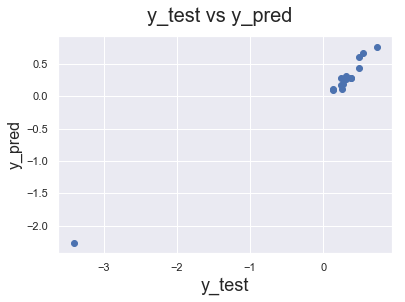

In [313]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [314]:
 #r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8954231599202147

#### For Camera accessories, the Multiplicative model with 6 variables, the r-squared on training and test data is about 99% and 89.5% respectively. The adjusted r-squared on the train set is about is about 99%.

#### Home Audio

In [315]:
# Taking logarithmic transormation on Home Audio data
merged_home_log = (np.log(merged_Home3.astype(float))).replace(-np.inf, 0)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [316]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_home_log, train_size=0.7, test_size=0.3, random_state=100)

In [317]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv',  'sla', 'product_mrp', 'product_procurement_sla',
       'pay_flag', 'holiday_flag', 'discount',
       's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_Dock',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_FMRadio',
       'product_analytic_vertical_HiFiSystem',
       'product_analytic_vertical_HomeAudioSpeaker',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SlingBox',
       'product_analytic_vertical_SoundMixer', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(key, value)


In [318]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [319]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [320]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-5.01683255e-02  2.50029086e-01 -2.16464489e-02  1.03683933e-02
 -3.37624100e-02 -1.38114988e-02  1.15585296e-01  8.29225067e-04
 -3.86722551e-02  2.88926485e-02  9.51626271e-02  3.13662926e-03
  6.41129446e-01 -2.01505479e-14 -2.11369698e-05  2.51765213e-02
  5.39618976e-01 -2.34232901e-01 -4.21188678e-01  5.34523017e-01
 -4.59243558e-01 -3.62682518e-01  1.13814994e-01 -2.20058340e-01
 -4.88072326e-01 -2.00146525e-02 -1.72056539e-02 -5.51811109e-02
 -7.20781081e-03  4.29016297e-03]
-5.876126713455805e-15


In [321]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False False False False False False  True False  True False  True False
  True False False False  True  True  True  True  True  True  True False
 False False False  True False False]
[ 3  8 10 12  7  9  1 17  1  5  1 16  1 19 18  4  1  1  1  1  1  1  1  2
  6 13 11  1 14 15]


In [322]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,s1_fact.order_payment_type_Prepaid,product_analytic_vertical_Dock,product_analytic_vertical_FMRadio,product_analytic_vertical_HomeAudioSpeaker,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,cold_day
20,1.0,1.111555,-0.084808,-0.390029,1.622312,0.808090,0.816792,1.023967,0.670050,0.512601,0.467917,0.967654,0.853342
7,1.0,-0.766840,0.068100,-0.353935,-0.426479,0.466987,-0.191411,-0.493651,-0.409267,0.269502,0.401023,-0.303358,0.853342
42,1.0,0.863562,1.148357,1.666271,0.671275,0.350106,-0.120515,1.135483,0.343093,-0.038472,-0.122053,-0.016195,0.257244
18,1.0,-0.581869,0.225047,-0.359058,0.050377,0.808090,0.816792,1.023967,0.670050,0.512601,0.467917,0.967654,0.853342
21,1.0,-0.745450,-0.591512,-0.303286,-0.624818,-1.093481,-0.772123,0.386770,0.494064,0.598797,0.460240,0.164229,-1.366065


In [323]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1178.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.73e-23
Time:                        22:09:45   Log-Likelihood:                 59.357
No. Observations:                  31   AIC:                            -92.71
Df Residuals:                      18   BIC:                            -74.07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [324]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Online marketing,23013.22
10,Affiliates,19709.33
8,Content Marketing,254.42
11,SEM,67.30
6,Digital,61.76
7,Sponsorship,55.11
5,TV,50.68
4,product_analytic_vertical_HomeAudioSpeaker,6.70
1,s1_fact.order_payment_type_Prepaid,6.60
2,product_analytic_vertical_Dock,4.82


In [325]:
X_train_rfe1.drop('Content Marketing', axis = 1, inplace = True)

In [326]:
X_train_rfe1.drop(' Affiliates', axis = 1, inplace = True)

In [327]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     866.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.16e-24
Time:                        22:09:46   Log-Likelihood:                 50.156
No. Observations:                  31   AIC:                            -78.31
Df Residuals:                      20   BIC:                            -62.54
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [328]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Digital,7.27
9,SEM,6.47
8,Online marketing,5.07
7,Sponsorship,4.46
5,TV,3.92
2,product_analytic_vertical_Dock,3.84
4,product_analytic_vertical_HomeAudioSpeaker,3.61
3,product_analytic_vertical_FMRadio,3.53
10,cold_day,2.68
1,s1_fact.order_payment_type_Prepaid,2.41


In [329]:
# dropping 
X_train_rfe1.drop('product_analytic_vertical_Dock', axis = 1, inplace = True)

In [330]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     985.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.64e-25
Time:                        22:09:46   Log-Likelihood:                 49.765
No. Observations:                  31   AIC:                            -79.53
Df Residuals:                      21   BIC:                            -65.19
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [331]:
# dropping Digital
X_train_rfe1.drop('Digital', axis = 1, inplace = True)

In [332]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1103.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.14e-27
Time:                        22:09:46   Log-Likelihood:                 48.962
No. Observations:                  31   AIC:                            -79.92
Df Residuals:                      22   BIC:                            -67.02
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [333]:
# dropping Online marketing
X_train_rfe1.drop('Online marketing', axis = 1, inplace = True)

In [334]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1304.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.41e-28
Time:                        22:09:46   Log-Likelihood:                 48.800
No. Observations:                  31   AIC:                            -81.60
Df Residuals:                      23   BIC:                            -70.13
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [335]:
# dropping TV
X_train_rfe1.drop('TV', axis = 1, inplace = True)

In [336]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1561.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.05e-30
Time:                        22:09:46   Log-Likelihood:                 48.535
No. Observations:                  31   AIC:                            -83.07
Df Residuals:                      24   BIC:                            -73.03
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

#### Making prediction


In [337]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [338]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [339]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [340]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['TV','Online marketing','Digital','product_analytic_vertical_Dock',' Affiliates','Content Marketing'], axis = 1)

In [341]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 6 to 33
Data columns (total 7 columns):
const                                         14 non-null float64
s1_fact.order_payment_type_Prepaid            14 non-null float64
product_analytic_vertical_FMRadio             14 non-null float64
product_analytic_vertical_HomeAudioSpeaker    14 non-null float64
Sponsorship                                   14 non-null float64
SEM                                           14 non-null float64
cold_day                                      14 non-null float64
dtypes: float64(7)
memory usage: 896.0 bytes


In [342]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

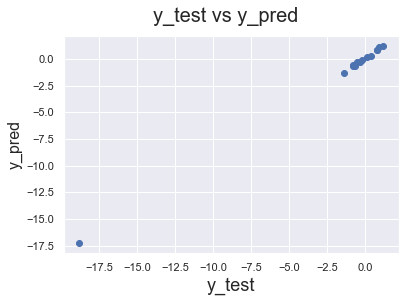

In [343]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [344]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9923807607948775

#### For Home Audio, the Multiplicative model with 6 variables, the r-squared on training and test data is about 99% and 99% respectively. The adjusted r-squared on the train set is about is about 99%

#### Game accessory

In [346]:
# Taking logarithmic transormation on CameraAccessories data
merged_game_log = (np.log(merged_game3.astype(float))).replace(-np.inf, 0)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [347]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_game_log, train_size=0.7, test_size=0.3, random_state=100)

In [348]:
merged_game_log.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'pay_flag', 'holiday_flag',
       's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_GameControlMount',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingChargingStation',
       'product_analytic_vertical_GamingGun',
       'product_analytic_vertical_GamingHeadset',
       'product_analytic_vertical_GamingKeyboard',
       'product_analytic_vertical_GamingMouse',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_GamingSpeaker',
       'product_analytic_vertical_JoystickGamingWheel',
       'product_analytic_vertical_MotionController',
       'product_analytic_vertical_TVOutCableAccessory', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day',
       'snow_day'],
      dtype='ob

In [349]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv', 'sla', 'product_procurement_sla', 'pay_flag', 'holiday_flag',
       's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_GameControlMount',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingChargingStation',
       'product_analytic_vertical_GamingGun',
       'product_analytic_vertical_GamingHeadset',
       'product_analytic_vertical_GamingKeyboard',
       'product_analytic_vertical_GamingMouse',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_GamingSpeaker',
       'product_analytic_vertical_JoystickGamingWheel',
       'product_analytic_vertical_MotionController',
       'product_analytic_vertical_TVOutCableAccessory', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day',
       'snow_day']
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(key, value)


In [350]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [351]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [352]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-1.70043273e-02  9.98164296e-02  1.69789309e-02  6.62197165e-02
 -1.50786387e-01 -4.54636329e-14  1.13568840e+00  1.07390082e-01
 -7.56219638e-02 -1.35447209e-14  3.80096571e-01 -2.53821619e-01
 -5.87290935e-01  8.57633005e-02  3.42357603e-02  2.96910661e-02
 -9.26151259e-02  2.42247617e-01 -2.15626465e+00  4.18835856e-01
  7.62496145e-01 -2.38515728e+00  4.63185106e+00 -6.37617875e-01
 -1.81173599e-01  4.48130554e-01  8.17797011e-01  1.28819689e-01
  4.10649849e-02  1.81141834e-02 -2.37143801e-02  3.42970015e-02]
-2.5224346867880193e-15


In [353]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False False False False False False  True False False False  True False
  True  True False False False  True  True  True  True  True  True False
 False  True  True False False False False False]
[18  5 19  9  6 20  1  4 10 21  1  3  1  1 13 16  8  1  1  1  1  1  1  7
  2  1  1 12 14 15 17 11]


In [354]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,product_analytic_vertical_GamePad,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingMouse,product_analytic_vertical_GamingMousePad,product_analytic_vertical_TVOutCableAccessory,TV,Digital,Sponsorship,Content Marketing,Online marketing,Radio,Other
25,1.0,0.435569,0.622619,0.523912,0.523893,0.376445,0.801277,0.326994,0.636337,0.333705,0.400185,-2.094544,1.575578
36,1.0,0.255107,0.332784,0.223072,0.221106,0.146208,0.548573,0.802390,0.869462,0.608541,0.520510,0.573828,-0.535805
17,1.0,0.574428,0.634284,0.475600,0.431828,0.585645,-0.088264,-0.936242,0.431664,0.530489,0.550508,-1.684251,-0.199086
7,1.0,0.240429,0.298232,0.484813,0.166823,0.238458,0.434337,-0.300812,-0.173244,0.129852,0.435908,0.573828,-0.535805
46,1.0,-3.298694,-3.086998,-2.874512,-3.024391,-3.074017,-2.577942,-0.298243,-2.120803,-2.513971,-2.594956,0.573828,-0.535805


In [355]:
# Fitting the model 
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     403.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.25e-22
Time:                        22:14:51   Log-Likelihood:                 44.327
No. Observations:                  34   AIC:                            -62.65
Df Residuals:                      21   BIC:                            -42.81
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [356]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Online marketing,1984.95
9,Content Marketing,920.57
6,TV,537.01
3,product_analytic_vertical_GamingMouse,114.34
12,Other,77.97
1,product_analytic_vertical_GamePad,76.41
5,product_analytic_vertical_TVOutCableAccessory,74.89
4,product_analytic_vertical_GamingMousePad,72.32
8,Sponsorship,68.51
2,product_analytic_vertical_GamingHeadset,36.24


In [357]:
X_train_rfe1.drop('Online marketing', axis = 1, inplace = True)

In [358]:
X_train_rfe1.drop('Content Marketing', axis = 1, inplace = True)

In [359]:
# Fitting the model 
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     401.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.42e-23
Time:                        22:14:52   Log-Likelihood:                 39.592
No. Observations:                  34   AIC:                            -57.18
Df Residuals:                      23   BIC:                            -40.39
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [360]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,product_analytic_vertical_GamePad,63.62
3,product_analytic_vertical_GamingMouse,57.03
5,product_analytic_vertical_TVOutCableAccessory,51.54
4,product_analytic_vertical_GamingMousePad,40.69
2,product_analytic_vertical_GamingHeadset,32.04
6,TV,19.38
8,Sponsorship,16.28
10,Other,6.20
9,Radio,4.52
7,Digital,2.07


In [361]:
X_train_rfe1.drop('product_analytic_vertical_GamePad', axis = 1, inplace = True)

In [362]:
# Fitting the model 
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     162.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.84e-19
Time:                        22:14:52   Log-Likelihood:                 21.868
No. Observations:                  34   AIC:                            -23.74
Df Residuals:                      24   BIC:                            -8.472
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [363]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,product_analytic_vertical_GamingMouse,40.73
3,product_analytic_vertical_GamingMousePad,40.14
1,product_analytic_vertical_GamingHeadset,31.49
4,product_analytic_vertical_TVOutCableAccessory,30.97
5,TV,18.34
7,Sponsorship,16.17
9,Other,6.08
8,Radio,4.51
6,Digital,1.98
0,const,1.00


In [364]:
X_train_rfe1.drop('product_analytic_vertical_GamingMousePad', axis = 1, inplace = True)

In [365]:
# Fitting the model 
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     189.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.04e-20
Time:                        22:14:52   Log-Likelihood:                 21.822
No. Observations:                  34   AIC:                            -25.64
Df Residuals:                      25   BIC:                            -11.91
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [366]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,product_analytic_vertical_GamingMouse,34.06
1,product_analytic_vertical_GamingHeadset,30.69
3,product_analytic_vertical_TVOutCableAccessory,17.13
6,Sponsorship,13.92
4,TV,12.95
8,Other,4.96
7,Radio,3.54
5,Digital,1.94
0,const,1.00


In [367]:
X_train_rfe1.drop('Radio', axis = 1, inplace = True)

In [368]:
# Fitting the model 
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.54e-21
Time:                        22:14:52   Log-Likelihood:                 21.600
No. Observations:                  34   AIC:                            -27.20
Df Residuals:                      26   BIC:                            -14.99
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [369]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,product_analytic_vertical_GamingMouse,31.30
1,product_analytic_vertical_GamingHeadset,23.40
3,product_analytic_vertical_TVOutCableAccessory,16.10
4,TV,8.52
6,Sponsorship,6.94
7,Other,1.95
5,Digital,1.80
0,const,1.00


In [370]:
X_train_rfe1.drop('Sponsorship', axis = 1, inplace = True)

In [371]:
# Fitting the model 
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     268.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           9.38e-23
Time:                        22:14:52   Log-Likelihood:                 21.535
No. Observations:                  34   AIC:                            -29.07
Df Residuals:                      27   BIC:                            -18.38
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [372]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,product_analytic_vertical_GamingMouse,30.68
1,product_analytic_vertical_GamingHeadset,22.87
3,product_analytic_vertical_TVOutCableAccessory,13.05
4,TV,4.35
6,Other,1.55
5,Digital,1.47
0,const,1.00


#### Making Predictions

In [373]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [374]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [375]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [376]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['Sponsorship','Radio','product_analytic_vertical_GamingMousePad','product_analytic_vertical_GamePad','Online marketing','Content Marketing'], axis = 1)

In [377]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 6 to 35
Data columns (total 7 columns):
const                                            15 non-null float64
product_analytic_vertical_GamingHeadset          15 non-null float64
product_analytic_vertical_GamingMouse            15 non-null float64
product_analytic_vertical_TVOutCableAccessory    15 non-null float64
TV                                               15 non-null float64
Digital                                          15 non-null float64
Other                                            15 non-null float64
dtypes: float64(7)
memory usage: 960.0 bytes


In [378]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

In [379]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9373965100528984

#### For Game Accessory, the Multiplicative model with 6 variables, the r-squared on training and test data is about 98% and 93.7% respectively. The adjusted r-squared on the train set is about is about 98%

### Koyck Model

#### Camera accessory

In [380]:
# Created a lag variable for gmv for Koyck model
merged_camera3['gmv_lag']=merged_camera3['gmv'].shift()

In [381]:
merged_camera3=merged_camera3.drop('product_mrp',axis=1)

In [382]:
merged_camera3.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'pay_flag', 'holiday_flag',
       'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBag',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryCharger',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraHousing',
       'product_analytic_vertical_CameraLEDLight',
       'product_analytic_vertical_CameraMicrophone',
       'product_analytic_vertical_CameraMount',
       'product_analytic_vertical_CameraRemoteControl',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_Filter', 'product_analytic_vertical_Flash',
       'product_analytic_vertical_FlashShoeAdapter',
       'product_ana

In [383]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_camera3, train_size=0.7, test_size=0.3, random_state=100)

In [384]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv', 'sla', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBag',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryCharger',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraHousing',
       'product_analytic_vertical_CameraLEDLight',
       'product_analytic_vertical_CameraMicrophone',
       'product_analytic_vertical_CameraMount',
       'product_analytic_vertical_CameraRemoteControl',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_Filter', 'product_analytic_vertical_Flash',
       'product_analytic_vertical_FlashShoeAdapter',
       'product_analytic_vertical_Lens',
       'product_analytic_vertical_ReflectorUmbrella',
       'product_analytic_vertical_Softbox', 'product_analytic_vertical_Strap',
       'product_analytic_vertical_Telescope', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day','gmv_lag']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [385]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [386]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [387]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-0.03338257 -0.14206556 -0.13261635 -0.01953632 -0.1185785   0.03918659
  0.26752399  0.14705757  0.22948772  0.05239917 -0.05751525 -0.05703048
 -0.16125039  0.0198262   0.00694642  0.06625146 -0.03891369 -0.12051319
  0.14229119  0.02330181  0.21415883  0.22126279 -0.01118632  0.54166135
  0.13169989  0.00176917 -0.1129353  -0.27473384 -0.06616424 -0.05020739
  0.15879913 -0.03607527 -0.01745154 -0.01206062 -0.03931242  0.08025239
  0.01120447 -0.1235082   0.12281622  0.06516547  0.10440368  0.00454028
 -0.05964835]
3.5094336341128775e-16


In [388]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe1 = RFE(lm, 10)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False False  True False False False False False  True False False False
  True False False False False False  True False  True  True False  True
 False False False  True False False  True False False False  True False
 False False False False False False False]
[27  6  1 17  7 21  3  2  1 14 16 18  1 29 32 26 15 19  1 13  1  1 30  1
  4 34  8  1 25 22  1 24 23 31  1  5 28 12 10 20 11 33  9]


In [389]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 10 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,pay_flag,product_analytic_vertical_CameraBattery,product_analytic_vertical_CameraFilmRolls,product_analytic_vertical_CameraTripod,product_analytic_vertical_Filter,product_analytic_vertical_Flash,product_analytic_vertical_Lens,product_analytic_vertical_Telescope,Sponsorship,SEM
35,1.0,-0.981198,-0.785871,-1.414767,-0.554367,-1.243751,-1.301144,-1.235234,-1.238237,-1.210624,-0.648133
33,1.0,-0.981198,-0.382695,-0.277901,-0.473462,-0.215445,-0.441218,-0.055713,0.186513,-1.082205,-0.434818
7,1.0,0.396778,-0.311546,-0.202110,0.084943,0.680176,-0.516926,0.217129,-0.383387,-0.673936,-0.305545
45,1.0,-0.981198,-0.827375,0.631593,-0.793911,-0.447643,-0.144100,0.141573,0.528452,-0.228644,-0.493569
20,1.0,1.734055,2.312068,-0.353692,0.646522,1.443112,-0.821185,0.863557,1.782232,1.316435,-0.181574


In [390]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     154.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.48e-18
Time:                        22:14:55   Log-Likelihood:                 23.543
No. Observations:                  33   AIC:                            -25.09
Df Residuals:                      22   BIC:                            -8.625
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [391]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,product_analytic_vertical_Lens,10.53
5,product_analytic_vertical_Filter,10.18
8,product_analytic_vertical_Telescope,6.25
10,SEM,5.54
9,Sponsorship,5.42
3,product_analytic_vertical_CameraFilmRolls,3.70
6,product_analytic_vertical_Flash,3.53
2,product_analytic_vertical_CameraBattery,3.50
4,product_analytic_vertical_CameraTripod,2.31
1,pay_flag,1.68


In [392]:
X_train_rfe1.drop('product_analytic_vertical_Telescope', axis = 1, inplace = True)

In [393]:
# Fitting the model 
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.47e-19
Time:                        22:14:55   Log-Likelihood:                 22.620
No. Observations:                  33   AIC:                            -25.24
Df Residuals:                      23   BIC:                            -10.27
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [394]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,product_analytic_vertical_Lens,10.07
5,product_analytic_vertical_Filter,10.05
9,SEM,4.54
8,Sponsorship,4.42
3,product_analytic_vertical_CameraFilmRolls,3.70
2,product_analytic_vertical_CameraBattery,3.26
6,product_analytic_vertical_Flash,2.68
4,product_analytic_vertical_CameraTripod,2.31
1,pay_flag,1.65
0,const,1.00


In [395]:
X_train_rfe1.drop('Sponsorship', axis = 1, inplace = True)

In [396]:
# Fitting the model 
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     186.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.09e-19
Time:                        22:14:55   Log-Likelihood:                 21.567
No. Observations:                  33   AIC:                            -25.13
Df Residuals:                      24   BIC:                            -11.67
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [397]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,product_analytic_vertical_Lens,10.05
5,product_analytic_vertical_Filter,9.98
3,product_analytic_vertical_CameraFilmRolls,3.62
2,product_analytic_vertical_CameraBattery,3.05
6,product_analytic_vertical_Flash,2.49
4,product_analytic_vertical_CameraTripod,2.28
8,SEM,1.96
1,pay_flag,1.62
0,const,1.00


In [398]:
# dropping 
X_train_rfe1.drop('product_analytic_vertical_Lens', axis = 1, inplace = True)

In [399]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     84.57
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.25e-16
Time:                        22:14:55   Log-Likelihood:                 6.0727
No. Observations:                  33   AIC:                             3.855
Df Residuals:                      25   BIC:                             15.83
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [400]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,product_analytic_vertical_Filter,3.92
2,product_analytic_vertical_CameraBattery,3.05
6,product_analytic_vertical_Flash,2.49
4,product_analytic_vertical_CameraTripod,2.28
3,product_analytic_vertical_CameraFilmRolls,2.10
7,SEM,1.94
1,pay_flag,1.62
0,const,1.00


#### Making Predictions for CameraAccessories

In [401]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [402]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [403]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [404]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['product_analytic_vertical_Lens','Sponsorship','product_analytic_vertical_Telescope'], axis = 1)

In [405]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 6 to 43
Data columns (total 8 columns):
const                                        15 non-null float64
pay_flag                                     15 non-null float64
product_analytic_vertical_CameraBattery      15 non-null float64
product_analytic_vertical_CameraFilmRolls    15 non-null float64
product_analytic_vertical_CameraTripod       15 non-null float64
product_analytic_vertical_Filter             15 non-null float64
product_analytic_vertical_Flash              15 non-null float64
SEM                                          15 non-null float64
dtypes: float64(8)
memory usage: 1.1 KB


In [406]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

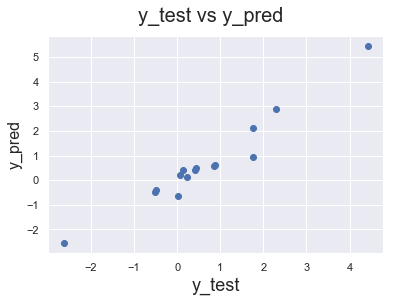

In [407]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [408]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9143804485272716

#### For Camera accessories, the Koyck model with 6 variables, the r-squared on training and test data is about 95% and 91.4% respectively. The adjusted r-squared on the train set is about is about 94%.

#### Filtering the data for Home Audio

In [409]:
# Created a lag variable for gmv for Koyck model
merged_Home3['gmv_lag']=merged_Home3['gmv'].shift()

In [410]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_Home3, train_size=0.7, test_size=0.3, random_state=100)

In [411]:
merged_Home3.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_Dock',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_FMRadio',
       'product_analytic_vertical_HiFiSystem',
       'product_analytic_vertical_HomeAudioSpeaker',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SlingBox',
       'product_analytic_vertical_SoundMixer', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day',
       'gmv_lag'],
      dtype='object')

In [412]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_Dock',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_FMRadio',
       'product_analytic_vertical_HiFiSystem',
       'product_analytic_vertical_HomeAudioSpeaker',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SlingBox',
       'product_analytic_vertical_SoundMixer', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day',
       'gmv_lag']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [413]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [414]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [415]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-5.55985587e-01 -2.10265234e+01  1.35440511e+00  5.34989101e-01
  2.47017123e-02  3.99828615e+00  5.53265203e+00  1.07544688e+00
 -6.24478073e+00  1.03537697e+00 -1.71995498e+00  5.95292273e-01
  1.91617478e+01  4.48635031e-01 -1.14024603e-01  9.95411788e-01
  8.35854175e+01 -3.32776612e+02 -1.13931497e+02  2.74355729e+02
  2.69987379e+02 -3.59562712e+02  6.82972042e+01 -2.31908914e+02
  1.49016597e+02 -3.22418115e+01  3.98186705e+01 -2.55059040e+00
 -9.73423632e-01  5.20963064e-01  9.47787579e-03]
-1.572767564641404e-13


In [416]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe1 = RFE(lm, 10)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False  True False False False  True False False False False  True False
  True False False False False  True  True  True  True  True  True False
 False False False False False False False]
[19  1  9 16 21  1 10 11  8 15  1 18  1  7 20 12  2  1  1  1  1  1  1  6
  5  4  3 13 14 17 22]


In [417]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 10 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,product_mrp,discount,product_analytic_vertical_FMRadio,product_analytic_vertical_HomeAudioSpeaker,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM
20,1.0,1.811389,2.107711,-0.504560,1.652078,0.175569,1.002812,0.294873,0.659576,0.575407,0.389167
7,1.0,-0.651278,-0.729605,-0.477188,-0.492149,-0.351575,-0.711438,-0.669897,0.163302,0.439737,-0.354559
42,1.0,0.489207,-0.301909,1.931583,0.405946,-0.327676,1.247948,-0.195755,-0.373353,-0.474329,-0.232233
18,1.0,-0.117832,0.627125,-0.481098,-0.157113,0.175569,1.002812,0.294873,0.659576,0.575407,0.389167
21,1.0,-0.691955,-0.138339,-0.438085,-0.611161,-0.500609,-0.005805,-0.002829,0.852920,0.559598,-0.143888


In [418]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1641.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.10e-27
Time:                        22:15:01   Log-Likelihood:                 60.039
No. Observations:                  31   AIC:                            -98.08
Df Residuals:                      20   BIC:                            -82.30
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [419]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,product_mrp,312.88
4,product_analytic_vertical_HomeAudioSpeaker,213.19
10,SEM,172.26
8,Online marketing,139.55
5,Digital,122.78
9,Affiliates,88.90
7,Content Marketing,39.71
2,discount,18.51
6,Sponsorship,8.45
3,product_analytic_vertical_FMRadio,7.12


In [420]:
# dropping product_mrp
X_train_rfe1.drop('product_mrp', axis = 1, inplace = True)

In [421]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     809.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.29e-24
Time:                        22:15:01   Log-Likelihood:                 46.715
No. Observations:                  31   AIC:                            -73.43
Df Residuals:                      21   BIC:                            -59.09
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [422]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,SEM,172.16
7,Online marketing,127.16
4,Digital,115.39
8,Affiliates,86.37
6,Content Marketing,34.93
3,product_analytic_vertical_HomeAudioSpeaker,7.74
1,discount,7.15
5,Sponsorship,5.48
2,product_analytic_vertical_FMRadio,4.17
0,const,1.00


In [423]:
# dropping SEM
X_train_rfe1.drop('SEM', axis = 1, inplace = True)

In [424]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     940.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.67e-26
Time:                        22:15:01   Log-Likelihood:                 46.497
No. Observations:                  31   AIC:                            -74.99
Df Residuals:                      22   BIC:                            -62.09
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [425]:
# dropping Online marketing
X_train_rfe1.drop('Online marketing', axis = 1, inplace = True)

In [426]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1087.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.95e-27
Time:                        22:15:01   Log-Likelihood:                 45.980
No. Observations:                  31   AIC:                            -75.96
Df Residuals:                      23   BIC:                            -64.49
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [427]:
# dropping Online marketing
X_train_rfe1.drop('Content Marketing', axis = 1, inplace = True)

In [428]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1321.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.18e-29
Time:                        22:15:01   Log-Likelihood:                 45.959
No. Observations:                  31   AIC:                            -77.92
Df Residuals:                      24   BIC:                            -67.88
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [429]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,product_analytic_vertical_HomeAudioSpeaker,6.82
1,discount,5.47
2,product_analytic_vertical_FMRadio,3.58
5,Sponsorship,3.27
4,Digital,2.72
6,Affiliates,1.98
0,const,1.00


#### Making prediction for HomeAudio

In [430]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [431]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [432]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [433]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['Content Marketing','Online marketing','SEM','product_mrp'], axis = 1)

In [434]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 6 to 33
Data columns (total 7 columns):
const                                         14 non-null float64
discount                                      14 non-null float64
product_analytic_vertical_FMRadio             14 non-null float64
product_analytic_vertical_HomeAudioSpeaker    14 non-null float64
Digital                                       14 non-null float64
Sponsorship                                   14 non-null float64
 Affiliates                                   14 non-null float64
dtypes: float64(7)
memory usage: 896.0 bytes


In [435]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

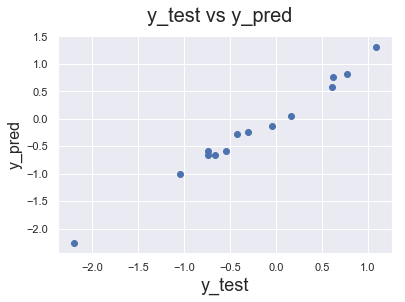

In [436]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [437]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9839417264037382

#### For Home Audio , the Koyck model with 6 variables, the r-squared on training and test data is about 99.7% and 98.4% respectively. The adjusted r-squared on the train set is about is about 99.6%

#### Koyck model for GamingAccessory

In [438]:
# Created a lag variable for gmv for Koyck model
merged_game3['gmv_lag']=merged_game3['gmv'].shift()

In [439]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_game3, train_size=0.7, test_size=0.3, random_state=100)

In [440]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv', 'sla', 'product_procurement_sla', 'pay_flag', 'holiday_flag',
       's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_GameControlMount',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingChargingStation',
       'product_analytic_vertical_GamingGun',
       'product_analytic_vertical_GamingHeadset',
       'product_analytic_vertical_GamingKeyboard',
       'product_analytic_vertical_GamingMouse',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_GamingSpeaker',
       'product_analytic_vertical_JoystickGamingWheel',
       'product_analytic_vertical_MotionController',
       'product_analytic_vertical_TVOutCableAccessory', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day',
       'snow_day', 'gmv_lag']
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [441]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [442]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [443]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-2.07158818e-02  2.78425306e-02  1.92371988e-02  1.57858633e-01
  1.07125309e-03 -2.38664819e-02  1.91559037e-01  2.04539845e-01
  1.21783897e-01 -3.17394772e-01  2.15016136e-01  1.29277285e-01
  2.08960650e-01  9.86649956e-02 -3.86295401e-02  2.32486506e-01
 -3.81375564e-02  2.25693559e-01  3.46262876e+00  2.67644437e+00
 -1.50486273e+00  3.17962033e+00  3.03184939e+00 -5.20080218e+00
 -6.05039422e+00  5.07251275e+00 -6.38593405e+00 -1.08014709e+00
 -7.28252179e-02  7.45058658e-02  4.72694514e-03 -6.17932169e-02
  5.60428585e-02]
-2.925679209730727e-15


In [444]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 10 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False False False False False False  True  True False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True False False False False False]
[17 18 19  5 22 20  1  1  9  7  2 13  6 10 14  8 16  4  1  1  1  1  1  1
  1  1  1  1  3 15 21 11 12]


In [445]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS
25,1.0,0.522752,0.053088,2.009562,-0.113567,0.377468,-0.364284,0.257047,0.431868,-0.306046,0.537297,1.300303,-0.100062
36,1.0,-0.126460,-0.162077,0.577165,0.185402,0.960604,0.396965,0.770499,0.685517,0.460612,-0.543876,-0.544481,-0.831087
17,1.0,1.184602,1.607060,-0.901115,-0.526319,-0.004849,0.094230,0.915248,0.674303,-0.086269,0.823124,0.032478,-0.489028
7,1.0,-0.170689,0.256300,0.145198,-0.369452,-0.680284,-0.584116,0.398956,0.589277,-0.302404,-0.543876,-0.544481,-0.558702
46,1.0,-1.845057,-2.170287,-1.401605,-0.368644,-1.186006,-0.768205,-2.054985,-2.125973,-0.649213,-0.543876,-0.544481,2.389206


In [446]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     24.58
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.15e-09
Time:                        22:15:06   Log-Likelihood:                -2.1559
No. Observations:                  34   AIC:                             30.31
Df Residuals:                      21   BIC:                             50.15
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [447]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,SEM,4598786.48
11,Other,3793706.03
8,Affiliates,2936996.30
10,Radio,2329405.52
3,TV,1144859.46
6,Content Marketing,1107557.59
7,Online marketing,1070149.26
4,Digital,942217.82
5,Sponsorship,198022.80
12,NPS,175556.88


In [448]:
X_train_rfe1.drop('SEM', axis = 1, inplace = True)

In [449]:
# Refitting with 11 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     18.61
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.17e-08
Time:                        22:15:06   Log-Likelihood:                -8.5878
No. Observations:                  34   AIC:                             41.18
Df Residuals:                      22   BIC:                             59.49
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [450]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Affiliates,945.61
7,Online marketing,785.86
10,Other,191.42
6,Content Marketing,165.33
9,Radio,156.37
4,Digital,116.53
3,TV,89.42
5,Sponsorship,68.99
11,NPS,33.14
2,product_analytic_vertical_GamingAccessoryKit,5.48


In [451]:
# dropping Affiliates
X_train_rfe1.drop(' Affiliates', axis = 1, inplace = True)

In [452]:
# Refitting with 10 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     19.80
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           5.28e-09
Time:                        22:15:06   Log-Likelihood:                -9.7769
No. Observations:                  34   AIC:                             41.55
Df Residuals:                      23   BIC:                             58.34
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [453]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Other,185.31
6,Content Marketing,148.22
8,Radio,128.68
4,Digital,96.58
3,TV,68.16
7,Online marketing,51.65
5,Sponsorship,26.80
10,NPS,14.91
2,product_analytic_vertical_GamingAccessoryKit,5.46
1,product_analytic_vertical_GamePad,3.70


In [454]:
# dropping Other
X_train_rfe1.drop('Other', axis = 1, inplace = True)

In [455]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     22.74
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.17e-09
Time:                        22:15:06   Log-Likelihood:                -9.9257
No. Observations:                  34   AIC:                             39.85
Df Residuals:                      24   BIC:                             55.12
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [456]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Content Marketing,117.84
4,Digital,80.59
7,Online marketing,25.17
9,NPS,14.81
5,Sponsorship,14.75
3,TV,9.91
8,Radio,9.32
2,product_analytic_vertical_GamingAccessoryKit,5.28
1,product_analytic_vertical_GamePad,3.48
0,const,1.00


In [457]:
# dropping Content Marketing
X_train_rfe1.drop('Content Marketing', axis = 1, inplace = True)

In [458]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     26.43
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.35e-10
Time:                        22:15:06   Log-Likelihood:                -10.046
No. Observations:                  34   AIC:                             38.09
Df Residuals:                      25   BIC:                             51.83
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [459]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,NPS,12.99
6,Online marketing,8.17
5,Sponsorship,5.82
2,product_analytic_vertical_GamingAccessoryKit,5.02
1,product_analytic_vertical_GamePad,3.43
4,Digital,2.78
3,TV,2.02
7,Radio,1.91
0,const,1.00


In [460]:
# dropping
X_train_rfe1.drop('NPS', axis = 1, inplace = True)

In [461]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     25.77
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.71e-10
Time:                        22:15:06   Log-Likelihood:                -13.028
No. Observations:                  34   AIC:                             42.06
Df Residuals:                      26   BIC:                             54.27
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [462]:
# dropping 
X_train_rfe1.drop('Online marketing', axis = 1, inplace = True)

In [463]:
# Refitting 

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     30.84
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.22e-11
Time:                        22:15:06   Log-Likelihood:                -13.209
No. Observations:                  34   AIC:                             40.42
Df Residuals:                      27   BIC:                             51.10
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [464]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Sponsorship,5.69
1,product_analytic_vertical_GamePad,3.23
2,product_analytic_vertical_GamingAccessoryKit,3.22
4,Digital,2.64
3,TV,1.80
6,Radio,1.44
0,const,1.00


#### Making prediction for GamingAccessories

In [465]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [466]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [467]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [468]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['Online marketing','NPS','Content Marketing','Other',' Affiliates','SEM'], axis = 1)

In [469]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 6 to 35
Data columns (total 7 columns):
const                                           15 non-null float64
product_analytic_vertical_GamePad               15 non-null float64
product_analytic_vertical_GamingAccessoryKit    15 non-null float64
TV                                              15 non-null float64
Digital                                         15 non-null float64
Sponsorship                                     15 non-null float64
Radio                                           15 non-null float64
dtypes: float64(7)
memory usage: 960.0 bytes


In [470]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

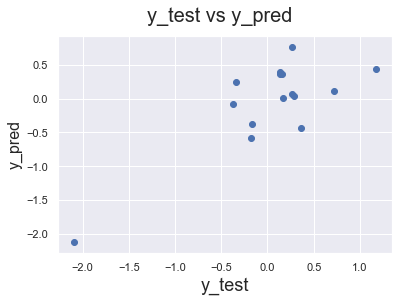

In [471]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [472]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6107780679297616

#### For Gaming accessories, the Koyck model with 6 variables, the r-squared on training and test data is about 87% and 61% respectively. The adjusted r-squared on the train set is about is about 84%

# Distributed lag model :

In [473]:
#Camera Accessary

In [474]:
merged_camera3.head(5)

,gmv,sla,product_procurement_sla,pay_flag,holiday_flag,discount,s1_fact.order_payment_type_Prepaid,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraBattery,...,Affiliates,SEM,Radio,Other,NPS,Stock_Index,cold_day,rain_day,snow_day,gmv_lag
0,1.148237e+07,6.343922,3.003447,1051.0,8049.0,0.529937,3100.0,72,920.0,1389.0,...,1.743428,7.981753,0.0,0.0,44.398389,302.50,6,1,0,NaN
1,3.647498e+06,6.980798,2.753323,0.0,0.0,0.438173,756.0,45,294.0,608.0,...,1.743428,7.981753,0.0,0.0,44.398389,302.50,2,1,0,1.148237e+07
2,3.340206e+06,6.274759,2.713753,0.0,0.0,0.453464,794.0,40,239.0,635.0,...,1.743428,7.981753,0.0,0.0,44.398389,302.50,2,0,0,3.647498e+06
3,6.260776e+06,5.497572,2.537362,438.0,0.0,0.590657,1485.0,63,352.0,877.0,...,1.743428,7.981753,0.0,0.0,44.398389,302.50,3,2,0,3.340206e+06
4,4.559747e+06,6.523473,2.967631,517.0,0.0,0.462871,1011.0,42,340.0,685.0,...,1.648942,1.305508,0.0,0.0,47.000000,308.25,6,1,0,6.260776e+06


In [475]:
merged_camera3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 44 columns):
gmv                                               48 non-null float64
sla                                               48 non-null float64
product_procurement_sla                           48 non-null float64
pay_flag                                          48 non-null float64
holiday_flag                                      48 non-null float64
discount                                          48 non-null float64
s1_fact.order_payment_type_Prepaid                48 non-null float64
product_analytic_vertical_CameraAccessory         48 non-null uint8
product_analytic_vertical_CameraBag               48 non-null float64
product_analytic_vertical_CameraBattery           48 non-null float64
product_analytic_vertical_CameraBatteryCharger    48 non-null float64
product_analytic_vertical_CameraBatteryGrip       48 non-null uint8
product_analytic_vertical_CameraEyeCup            48 non-null

In [476]:
# Created a lag variable for gmv for lag distributed model
merged_camera3['gmv_lag']=merged_camera3['gmv'].shift(1)

In [477]:
merged_camera3['NPS_lag']=merged_camera3['NPS'].shift(1)

In [478]:
merged_camera3['discount_lag']=merged_camera3['discount'].shift(1)

In [479]:
merged_camera3.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'pay_flag', 'holiday_flag',
       'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBag',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryCharger',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraHousing',
       'product_analytic_vertical_CameraLEDLight',
       'product_analytic_vertical_CameraMicrophone',
       'product_analytic_vertical_CameraMount',
       'product_analytic_vertical_CameraRemoteControl',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_Filter', 'product_analytic_vertical_Flash',
       'product_analytic_vertical_FlashShoeAdapter',
       'product_ana

In [480]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_camera3, train_size=0.7, test_size=0.3, random_state=100)

In [481]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv', 'sla', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBag',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryCharger',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraHousing',
       'product_analytic_vertical_CameraLEDLight',
       'product_analytic_vertical_CameraMicrophone',
       'product_analytic_vertical_CameraMount',
       'product_analytic_vertical_CameraRemoteControl',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_Filter', 'product_analytic_vertical_Flash',
       'product_analytic_vertical_FlashShoeAdapter',
       'product_analytic_vertical_Lens',
       'product_analytic_vertical_ReflectorUmbrella',
       'product_analytic_vertical_Softbox', 'product_analytic_vertical_Strap',
       'product_analytic_vertical_Telescope', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day','gmv_lag','NPS_lag','discount_lag']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [482]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [483]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [484]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-0.02857764 -0.15868821 -0.18873028  0.02563325 -0.03046263  0.05153162
  0.26649914  0.13065311  0.2457999   0.04646092  0.01827265 -0.02766391
 -0.13279411  0.02433019  0.01060657  0.02931439 -0.02067301 -0.07968652
  0.09253865  0.06504965  0.24156523  0.23004143  0.01234117  0.48520719
  0.11880912 -0.00837941 -0.15079264 -0.24253702 -0.07862711 -0.06310542
  0.16097668 -0.01484783 -0.01645549 -0.0204841  -0.04281384  0.08279433
  0.01231637 -0.07371819  0.12577704  0.02220259  0.1078975   0.01917261
 -0.09258526 -0.06587291  0.1095283 ]
2.304510557906125e-16


In [485]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe1 = RFE(lm, 10)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False False  True False False False  True  True  True False False False
  True False False False False False  True False  True  True False  True
 False False False  True False False False False False False False False
 False False False False False False False False False]
[19  3  1 28 20 17  1  1  1 15 32 30  1 23 35 27 33 18  1 12  1  1 34  1
  2 36  8  1 14 24  6 26 22 25  5 21  7 16  9 29 11 31 10 13  4]


In [486]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 10 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,pay_flag,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraBattery,product_analytic_vertical_CameraFilmRolls,product_analytic_vertical_CameraTripod,product_analytic_vertical_Filter,product_analytic_vertical_Flash,product_analytic_vertical_Lens,product_analytic_vertical_Telescope
35,1.0,-0.981198,0.099106,-1.039380,-0.785871,-1.414767,-0.554367,-1.243751,-1.301144,-1.235234,-1.238237
33,1.0,-0.981198,0.350684,0.052005,-0.382695,-0.277901,-0.473462,-0.215445,-0.441218,-0.055713,0.186513
7,1.0,0.396778,-1.058151,-0.106167,-0.311546,-0.202110,0.084943,0.680176,-0.516926,0.217129,-0.383387
45,1.0,-0.981198,0.099106,0.020371,-0.827375,0.631593,-0.793911,-0.447643,-0.144100,0.141573,0.528452
20,1.0,1.734055,2.162043,1.586270,2.312068,-0.353692,0.646522,1.443112,-0.821185,0.863557,1.782232


In [487]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     144.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.12e-17
Time:                        22:15:11   Log-Likelihood:                 22.469
No. Observations:                  33   AIC:                            -22.94
Df Residuals:                      22   BIC:                            -6.476
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [488]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,product_analytic_vertical_CameraBag,14.47
9,product_analytic_vertical_Lens,13.63
7,product_analytic_vertical_Filter,10.37
10,product_analytic_vertical_Telescope,7.15
4,product_analytic_vertical_CameraBattery,4.35
5,product_analytic_vertical_CameraFilmRolls,3.48
2,product_analytic_vertical_CameraAccessory,3.26
8,product_analytic_vertical_Flash,3.20
6,product_analytic_vertical_CameraTripod,1.70
1,pay_flag,1.58


In [489]:
X_train_rfe1.drop('product_analytic_vertical_CameraBag', axis = 1, inplace = True)

In [490]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     167.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.31e-19
Time:                        22:15:11   Log-Likelihood:                 22.467
No. Observations:                  33   AIC:                            -24.93
Df Residuals:                      23   BIC:                            -9.969
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [491]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,product_analytic_vertical_Lens,10.47
6,product_analytic_vertical_Filter,10.00
9,product_analytic_vertical_Telescope,5.16
3,product_analytic_vertical_CameraBattery,4.24
4,product_analytic_vertical_CameraFilmRolls,3.47
2,product_analytic_vertical_CameraAccessory,3.26
7,product_analytic_vertical_Flash,3.08
5,product_analytic_vertical_CameraTripod,1.69
1,pay_flag,1.58
0,const,1.00


In [492]:
X_train_rfe1.drop('product_analytic_vertical_Lens', axis = 1, inplace = True)


In [493]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm3 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     72.58
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.22e-15
Time:                        22:15:11   Log-Likelihood:                 6.4131
No. Observations:                  33   AIC:                             5.174
Df Residuals:                      24   BIC:                             18.64
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [494]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,product_analytic_vertical_Telescope,4.93
6,product_analytic_vertical_Filter,4.78
3,product_analytic_vertical_CameraBattery,4.20
2,product_analytic_vertical_CameraAccessory,3.25
7,product_analytic_vertical_Flash,3.07
4,product_analytic_vertical_CameraFilmRolls,2.15
5,product_analytic_vertical_CameraTripod,1.69
1,pay_flag,1.58
0,const,1.00


In [495]:
#dropping variable due to high p-value
X_train_rfe1.drop('product_analytic_vertical_CameraAccessory', axis = 1, inplace = True)

In [496]:
 # Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm4 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     82.29
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.14e-15
Time:                        22:15:11   Log-Likelihood:                 5.6409
No. Observations:                  33   AIC:                             4.718
Df Residuals:                      25   BIC:                             16.69
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [497]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,product_analytic_vertical_Telescope,4.74
5,product_analytic_vertical_Filter,4.71
2,product_analytic_vertical_CameraBattery,3.43
6,product_analytic_vertical_Flash,2.76
3,product_analytic_vertical_CameraFilmRolls,2.14
4,product_analytic_vertical_CameraTripod,1.65
1,pay_flag,1.53
0,const,1.00


In [498]:
#dropping variable due to high p-value
X_train_rfe1.drop('product_analytic_vertical_Telescope', axis = 1, inplace = True)

In [499]:
 # Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm4 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.99
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.37e-16
Time:                        22:15:12   Log-Likelihood:                 5.3453
No. Observations:                  33   AIC:                             3.309
Df Residuals:                      26   BIC:                             13.79
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [500]:
#dropping variable due to high p-value
X_train_rfe1.drop('product_analytic_vertical_CameraFilmRolls', axis = 1, inplace = True)

In [501]:
 # Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm4 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.98e-17
Time:                        22:15:12   Log-Likelihood:                 4.6885
No. Observations:                  33   AIC:                             2.623
Df Residuals:                      27   BIC:                             11.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [502]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,product_analytic_vertical_Filter,3.68
2,product_analytic_vertical_CameraBattery,2.86
3,product_analytic_vertical_CameraTripod,1.58
1,pay_flag,1.52
5,product_analytic_vertical_Flash,1.38
0,const,1.00


In [503]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [504]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [505]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [506]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['product_analytic_vertical_Lens','product_analytic_vertical_CameraBag','product_analytic_vertical_CameraAccessory','product_analytic_vertical_CameraFilmRolls','product_analytic_vertical_Telescope'], axis = 1)

In [507]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 6 to 43
Data columns (total 6 columns):
const                                      15 non-null float64
pay_flag                                   15 non-null float64
product_analytic_vertical_CameraBattery    15 non-null float64
product_analytic_vertical_CameraTripod     15 non-null float64
product_analytic_vertical_Filter           15 non-null float64
product_analytic_vertical_Flash            15 non-null float64
dtypes: float64(6)
memory usage: 840.0 bytes


In [508]:
# Making predictions
y_pred = lm4.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

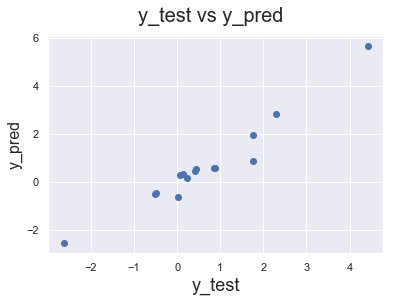

In [509]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [510]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9004652227855078

# Home Audio

In [511]:
merged_Home3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 32 columns):
gmv                                           45 non-null float64
sla                                           45 non-null float64
product_mrp                                   45 non-null int64
product_procurement_sla                       45 non-null float64
pay_flag                                      45 non-null float64
holiday_flag                                  45 non-null float64
discount                                      45 non-null float64
s1_fact.order_payment_type_Prepaid            45 non-null float64
product_analytic_vertical_DJController        45 non-null uint8
product_analytic_vertical_Dock                45 non-null uint8
product_analytic_vertical_DockingStation      45 non-null uint8
product_analytic_vertical_FMRadio             45 non-null float64
product_analytic_vertical_HiFiSystem          45 non-null uint8
product_analytic_vertical_HomeAudioSpeaker    45 

In [512]:
# Created a lag variable for gmv for distributed model
merged_Home3['gmv_lag']=merged_Home3['gmv'].shift(1)

In [513]:
merged_Home3['NPS_lag']=merged_Home3['NPS'].shift(1)

In [514]:
merged_Home3['discount_lag']=merged_Home3['discount'].shift(1)

In [515]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_Home3, train_size=0.7, test_size=0.3, random_state=100)

In [516]:
merged_Home3.columns

Index(['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_Dock',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_FMRadio',
       'product_analytic_vertical_HiFiSystem',
       'product_analytic_vertical_HomeAudioSpeaker',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SlingBox',
       'product_analytic_vertical_SoundMixer', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day',
       'gmv_lag', 'NPS_lag', 'discount_lag'],
      dtype='object')

In [517]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv', 'sla', 'product_mrp', 'product_procurement_sla', 'pay_flag',
       'holiday_flag', 'discount', 's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_Dock',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_FMRadio',
       'product_analytic_vertical_HiFiSystem',
       'product_analytic_vertical_HomeAudioSpeaker',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SlingBox',
       'product_analytic_vertical_SoundMixer', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day', 'snow_day',
       'gmv_lag','NPS_lag','discount_lag']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [518]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [519]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [520]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-6.33556785e-02  4.68339046e-01 -7.59483491e-02  1.54666663e-02
 -6.50672152e-02 -3.28149274e-03 -1.42560765e-03  2.39222486e-02
  6.44882531e-02  4.78067004e-02  2.23648405e-01 -1.78655706e-02
  3.63035299e-01  2.85892190e-02  3.27675722e-03 -5.61231614e-03
  2.20076281e-02  9.73315347e-02 -2.14506071e-01 -2.30188523e-01
  1.72174237e-01 -1.11280759e-01  2.23634334e-01  3.22301539e-02
 -1.00803836e-01  2.51091836e-02 -1.22334269e-01 -5.96631760e-03
 -3.51158473e-04  4.99095083e-03  6.18946468e-02  6.95407829e-03
 -6.22851228e-02]
4.290589379186849e-16


In [521]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe1 = RFE(lm, 10)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False  True False False False False False False False False  True False
  True False False False False  True  True  True  True  True False  True
  True False False False False False False False False]
[ 9  1  6 15  8 22 23 14  7 13  1 16  1 12 21 18  4  1  1  1  1  1  2  1
  1  5  3 20 24 19 11 17 10]


In [522]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 10 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,product_mrp,product_analytic_vertical_FMRadio,product_analytic_vertical_HomeAudioSpeaker,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,Radio,Other
20,1.0,1.811389,-0.504560,1.652078,0.175569,1.002812,0.294873,0.659576,0.575407,-0.561456,-0.506366
7,1.0,-0.651278,-0.477188,-0.492149,-0.351575,-0.711438,-0.669897,0.163302,0.439737,-0.561456,-0.506366
42,1.0,0.489207,1.931583,0.405946,-0.327676,1.247948,-0.195755,-0.373353,-0.474329,-0.561456,-0.506366
18,1.0,-0.117832,-0.481098,-0.157113,0.175569,1.002812,0.294873,0.659576,0.575407,-0.561456,-0.506366
21,1.0,-0.691955,-0.438085,-0.611161,-0.500609,-0.005805,-0.002829,0.852920,0.559598,0.629935,0.036308


In [523]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1354.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.86e-26
Time:                        22:15:17   Log-Likelihood:                 57.056
No. Observations:                  31   AIC:                            -92.11
Df Residuals:                      20   BIC:                            -76.34
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [524]:
#dropping variable due to high p-value
X_train_rfe1.drop('Content Marketing', axis = 1, inplace = True)

In [525]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1575.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           1.21e-27
Time:                        22:15:17   Log-Likelihood:                 57.015
No. Observations:                  31   AIC:                            -94.03
Df Residuals:                      21   BIC:                            -79.69
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [526]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Online marketing,285.70
7,Affiliates,235.40
8,Radio,111.83
1,product_mrp,91.04
9,Other,90.80
3,product_analytic_vertical_HomeAudioSpeaker,89.82
5,Sponsorship,8.62
4,Digital,4.89
2,product_analytic_vertical_FMRadio,2.83
0,const,1.00


In [527]:
#dropping variable due to high VIF
X_train_rfe1.drop('Online marketing', axis = 1, inplace = True)

In [528]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm3 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1839.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.98e-29
Time:                        22:15:17   Log-Likelihood:                 56.868
No. Observations:                  31   AIC:                            -95.74
Df Residuals:                      22   BIC:                            -82.83
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [529]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,product_mrp,89.64
3,product_analytic_vertical_HomeAudioSpeaker,89.09
7,Radio,16.78
8,Other,15.96
5,Sponsorship,4.16
4,Digital,3.70
2,product_analytic_vertical_FMRadio,2.80
6,Affiliates,1.58
0,const,1.00


In [530]:
#dropping variable due to high VIF
X_train_rfe1.drop('product_mrp', axis = 1, inplace = True)

In [531]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm4 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     802.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.27e-26
Time:                        22:15:17   Log-Likelihood:                 41.301
No. Observations:                  31   AIC:                            -66.60
Df Residuals:                      23   BIC:                            -55.13
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [532]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Radio,16.45
7,Other,15.39
4,Sponsorship,3.53
1,product_analytic_vertical_FMRadio,2.74
3,Digital,2.64
2,product_analytic_vertical_HomeAudioSpeaker,2.32
5,Affiliates,1.57
0,const,1.00


In [533]:
#dropping variable due to high vif
X_train_rfe1.drop('Radio', axis = 1, inplace = True)

In [534]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm5 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     955.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.48e-27
Time:                        22:15:17   Log-Likelihood:                 40.956
No. Observations:                  31   AIC:                            -67.91
Df Residuals:                      24   BIC:                            -57.87
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [535]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Sponsorship,3.53
1,product_analytic_vertical_FMRadio,2.73
3,Digital,2.57
2,product_analytic_vertical_HomeAudioSpeaker,2.26
6,Other,1.54
5,Affiliates,1.42
0,const,1.00


In [536]:
#dropping variable due to high p-value
X_train_rfe1.drop('Other', axis = 1, inplace = True)

In [537]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm6 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           7.43e-29
Time:                        22:15:17   Log-Likelihood:                 40.841
No. Observations:                  31   AIC:                            -69.68
Df Residuals:                      25   BIC:                            -61.08
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [538]:
#dropping variable due to high p-value
X_train_rfe1.drop(' Affiliates', axis = 1, inplace = True)

In [539]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm7 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1391.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           6.62e-30
Time:                        22:15:17   Log-Likelihood:                 39.263
No. Observations:                  31   AIC:                            -68.53
Df Residuals:                      26   BIC:                            -61.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [540]:
#making prediction for home audio for distributed lag

In [541]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [542]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [543]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [544]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['Content Marketing','Online marketing','product_mrp','Radio','Other',' Affiliates'], axis = 1)

In [545]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 6 to 33
Data columns (total 5 columns):
const                                         14 non-null float64
product_analytic_vertical_FMRadio             14 non-null float64
product_analytic_vertical_HomeAudioSpeaker    14 non-null float64
Digital                                       14 non-null float64
Sponsorship                                   14 non-null float64
dtypes: float64(5)
memory usage: 672.0 bytes


In [546]:
# Making predictions
y_pred = lm7.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

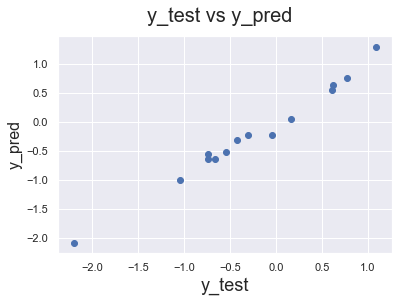

In [547]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [548]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9827365431032633

### Ditributed lag model for gaming accessary

In [550]:
merged_game3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 34 columns):
gmv                                                49 non-null float64
sla                                                49 non-null float64
product_procurement_sla                            49 non-null float64
pay_flag                                           49 non-null float64
holiday_flag                                       49 non-null float64
s1_fact.order_payment_type_Prepaid                 49 non-null float64
product_analytic_vertical_GameControlMount         49 non-null uint8
product_analytic_vertical_GamePad                  49 non-null float64
product_analytic_vertical_GamingAccessoryKit       49 non-null float64
product_analytic_vertical_GamingChargingStation    49 non-null uint8
product_analytic_vertical_GamingGun                49 non-null uint8
product_analytic_vertical_GamingHeadset            49 non-null float64
product_analytic_vertical_GamingKeyboard           

In [551]:
# Created a lag variable for gmv for distributed model
merged_game3['gmv_lag']=merged_game3['gmv'].shift(1)

In [552]:
merged_game3['NPS_lag']=merged_game3['NPS'].shift(1)

In [553]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(merged_game3, train_size=0.7, test_size=0.3, random_state=100)

In [554]:
merged_game3.columns

Index(['gmv', 'sla', 'product_procurement_sla', 'pay_flag', 'holiday_flag',
       's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_GameControlMount',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingChargingStation',
       'product_analytic_vertical_GamingGun',
       'product_analytic_vertical_GamingHeadset',
       'product_analytic_vertical_GamingKeyboard',
       'product_analytic_vertical_GamingMouse',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_GamingSpeaker',
       'product_analytic_vertical_JoystickGamingWheel',
       'product_analytic_vertical_MotionController',
       'product_analytic_vertical_TVOutCableAccessory', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day',
       'snow_day', 'gmv_lag', 'NPS_

In [555]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist =['gmv','sla',  'product_procurement_sla',
       'pay_flag', 'holiday_flag',
       's1_fact.order_payment_type_Prepaid',
       'product_analytic_vertical_GameControlMount',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingChargingStation',
       'product_analytic_vertical_GamingGun',
       'product_analytic_vertical_GamingHeadset',
       'product_analytic_vertical_GamingKeyboard',
       'product_analytic_vertical_GamingMouse',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_GamingSpeaker',
       'product_analytic_vertical_JoystickGamingWheel',
       'product_analytic_vertical_MotionController',
       'product_analytic_vertical_TVOutCableAccessory', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'NPS', 'Stock_Index', 'cold_day', 'rain_day',
       'snow_day','gmv_lag','NPS_lag']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [556]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [557]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [558]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-0.01871244  0.02718848  0.01881024  0.15601914  0.00919621 -0.02430904
  0.18897187  0.20745862  0.11738093 -0.30093998  0.21702748  0.10656975
  0.21746392  0.09585445 -0.03345906  0.22254131 -0.02804585  0.21911193
  0.17070571 -0.284065   -0.14858873 -0.02707944 -0.10131922  0.01717132
  0.48014511  0.34951652 -0.376559    0.1883896  -0.08184989  0.06044316
  0.0017973  -0.06007242  0.05401143 -0.00724686]
-2.6487564228000757e-16


In [559]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe1 = RFE(lm, 10)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True False False False False False False]
[19 20 21  7 23 22  2  3 11  9  4 15  8 12 16 10 18  6  1  1  1  1  1  1
  1  1  1  1  5 17 25 13 14 24]


In [560]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 10 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS
25,1.0,2.009562,-0.113567,0.377468,-0.364284,0.257047,0.431868,-0.306046,0.537297,1.300303,-0.100062
36,1.0,0.577165,0.185402,0.960604,0.396965,0.770499,0.685517,0.460612,-0.543876,-0.544481,-0.831087
17,1.0,-0.901115,-0.526319,-0.004849,0.094230,0.915248,0.674303,-0.086269,0.823124,0.032478,-0.489028
7,1.0,0.145198,-0.369452,-0.680284,-0.584116,0.398956,0.589277,-0.302404,-0.543876,-0.544481,-0.558702
46,1.0,-1.401605,-0.368644,-1.186006,-0.768205,-2.054985,-2.125973,-0.649213,-0.543876,-0.544481,2.389206


In [561]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     4.185
Date:                Sun, 22 Dec 2019   Prob (F-statistic):            0.00219
Time:                        22:15:22   Log-Likelihood:                -30.621
No. Observations:                  34   AIC:                             83.24
Df Residuals:                      23   BIC:                             100.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.527e-16      0.12

In [562]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,SEM,2874878.49
9,Other,2365913.72
6,Affiliates,1828267.66
8,Radio,1453470.43
1,TV,713100.88
4,Content Marketing,691450.13
5,Online marketing,665218.41
2,Digital,589441.33
3,Sponsorship,122761.36
10,NPS,109703.90


In [563]:
#dropping variable due to high p-value
X_train_rfe1.drop('SEM', axis = 1, inplace = True)

In [564]:
 # Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     4.827
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           0.000959
Time:                        22:15:22   Log-Likelihood:                -30.678
No. Observations:                  34   AIC:                             81.36
Df Residuals:                      24   BIC:                             96.62
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.527e-16      0.12

In [565]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Affiliates,921.70
5,Online marketing,767.33
8,Other,164.76
4,Content Marketing,149.80
7,Radio,144.59
2,Digital,111.08
1,TV,72.23
3,Sponsorship,57.04
9,NPS,30.82
0,const,1.00


In [566]:
#dropping variable due to high p-value
X_train_rfe1.drop(' Affiliates', axis = 1, inplace = True)

In [567]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm3 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5.237
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           0.000645
Time:                        22:15:22   Log-Likelihood:                -31.512
No. Observations:                  34   AIC:                             81.02
Df Residuals:                      25   BIC:                             94.76
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.527e-16      0.12

In [568]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Other,155.61
4,Content Marketing,133.76
6,Radio,112.60
2,Digital,91.38
1,TV,54.28
5,Online marketing,48.78
3,Sponsorship,19.00
8,NPS,12.20
0,const,1.00


In [569]:
#dropping variable due to high vif
X_train_rfe1.drop('Other', axis = 1, inplace = True)

In [570]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm4 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     4.710
Date:                Sun, 22 Dec 2019   Prob (F-statistic):            0.00161
Time:                        22:15:22   Log-Likelihood:                -34.323
No. Observations:                  34   AIC:                             84.65
Df Residuals:                      26   BIC:                             96.86
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.527e-16      0.13

In [571]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Content Marketing,112.10
2,Digital,77.78
5,Online marketing,23.98
3,Sponsorship,12.32
7,NPS,11.15
6,Radio,9.09
1,TV,9.01
0,const,1.00


In [572]:
#dropping variable due to high high vif
X_train_rfe1.drop('Content Marketing', axis = 1, inplace = True)

In [573]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm5 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     5.521
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           0.000772
Time:                        22:15:22   Log-Likelihood:                -34.634
No. Observations:                  34   AIC:                             83.27
Df Residuals:                      27   BIC:                             93.95
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.527e-16      0.129  

In [574]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,NPS,8.35
4,Online marketing,7.08
3,Sponsorship,4.30
2,Digital,2.02
1,TV,1.83
5,Radio,1.80
0,const,1.00


In [575]:
#dropping variable due to vif
X_train_rfe1.drop('NPS', axis = 1, inplace = True)

In [576]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm6 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     5.497
Date:                Sun, 22 Dec 2019   Prob (F-statistic):            0.00120
Time:                        22:15:22   Log-Likelihood:                -36.617
No. Observations:                  34   AIC:                             85.23
Df Residuals:                      28   BIC:                             94.39
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.527e-16      0.134  

In [577]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Sponsorship,2.98
4,Online marketing,2.15
2,Digital,1.89
1,TV,1.82
5,Radio,1.79
0,const,1.00


In [578]:
#dropping variable due to high p-value
X_train_rfe1.drop('TV', axis = 1, inplace = True)

In [579]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm7 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     6.558
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           0.000692
Time:                        22:15:22   Log-Likelihood:                -37.292
No. Observations:                  34   AIC:                             84.58
Df Residuals:                      29   BIC:                             92.22
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.527e-16      0.135  

In [580]:
#dropping variable due to high p-value
X_train_rfe1.drop('Radio', axis = 1, inplace = True)

In [581]:
# Refitting

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 10 variables
lm8 = sm.OLS(y_train, X_train_rfe1).fit()  
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     8.368
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           0.000343
Time:                        22:15:23   Log-Likelihood:                -37.908
No. Observations:                  34   AIC:                             83.82
Df Residuals:                      30   BIC:                             89.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.527e-16      0.135  

In [582]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Sponsorship,2.17
1,Digital,1.86
3,Online marketing,1.28
0,const,1.00


In [583]:
#making prediction for Gaming 

In [584]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [585]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [586]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [587]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['Content Marketing','SEM','NPS','TV','Radio','Other',' Affiliates'], axis = 1)

In [588]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 6 to 35
Data columns (total 4 columns):
const               15 non-null float64
Digital             15 non-null float64
Sponsorship         15 non-null float64
Online marketing    15 non-null float64
dtypes: float64(4)
memory usage: 600.0 bytes


In [589]:
# Making predictions
y_pred = lm8.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

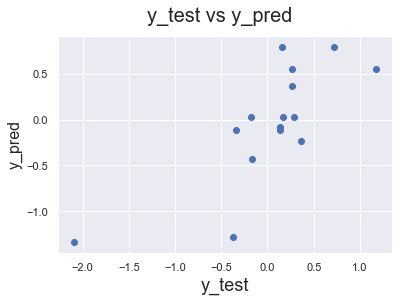

In [590]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [591]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.57177221847921